Analysis of the data from the first data collection for the ETS scale. 

In [1]:
import warnings
import scaledev
from scaledev import modeler, preprocessor, vizer
import numpy as np
import pandas as pd
import pingouin as pg

warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn")

In [2]:
data_loc = scaledev.get_data_dir()

# Show full dataframes when printing
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.float_format", lambda x: "%.5f" % x)
np.set_printoptions(threshold=100, suppress=True)

# load raw data
df_raw = pd.read_excel(data_loc / "ets_data.xlsx")
df_raw.head()

,1 (AE8),2 (Cx11),3 (Sp4),4 (C7),5 (Cx6),6 (Ex6),7 (C5),8 (Ex3),9 (AE3),10 (C8),11 (Cx4),12 (Ex8),13 (TO8),14 (AE5),15 (TO3),16 (TO1),17 (C4),18 (Se2),19 (TO10),20 (Ex2),21 (Cx3),22 (TO4),23 (Se1),24 (T3),25 (TO11),26 (Cx8),27 (C10),28 (Ex1),29 (T2),30 (T1),31 (Cx7),32 (AE6),33 (Em3),34 (Em8),35 (C6),36 (C2),37 (TO7),38 (AE2),39 (TO6),40 (TO5),41 (AE7),42 (C9),43 (AE1),44 (EM1),45 (Ex7),46 (Sp3),47 (Sp1),48 (TO2),49 (AE9),50 (Em9),51 (Em6),52 (Sp6),53 (C1),54 (Sp5),55 (C14),56 (Cx9),57 (Em4),58 (Ex4),59 (AE4),60 (TO12),61 (Cx1),62 (Em7) .,63 (C13),64 (Cx5),65 (Sp2),66 (Cx2),67 (Cx12),68 (C12),69 (Em5),70 (TO9),71 (Ex5),72 (C3),73 (Cx10),74 (Em2),75 (C15),76 (C11),77(RS1),Age,Gender,Ethnicity
0,5,4,4,3,5,3,3,4,4,4,4,3,3,4,4,4,4,4,4,4,4,4,4,3,4,3,5,3,3,4,4,4,4,3,3,3,4,4,5,5,3,5,5,5,5,3,5,5,4,3,3,4,3,4,4,4,3,4,3,3,4,4,2,4,5,4,5,4,4,4,4,4,4,3,4,5,2.00000,5,3,5
1,5,4,3,3,4,2,2,3,3,3,4,3,3,3,4,3,3,4,3,4,2,4,3,5,4,2,5,2,5,4,2,3,3,3,3,4,3,4,3,4,2,4,4,5,5,3,3,4,4,4,4,3,2,2,4,2,4,5,4,2,2,4,4,2,3,3,3,5,3,3,4,4,3,4,3,5,3.00000,4,3,5
2,3,3,2,3,3,2,3,2,3,4,2,3,2,1,3,3,3,3,3,1,1,2,1,1,2,1,2,5,3,1,3,2,2,4,4,3,3,2,3,3,2,3,4,3,4,1,3,4,2,1,1,3,3,3,2,2,1,4,1,3,2,1,1,1,1,1,2,2,2,2,1,3,2,1,3,4,1.00000,4,3,5
3,5,5,5,5,5,5,5,5,6,5,5,5,4,5,5,5,5,3,5,5,5,5,4,5,5,5,3,5,5,5,3,5,5,5,5,5,5,5,5,5,2,5,5,5,3,5,5,5,5,5,5,5,5,5,3,5,5,5,5,5,5,5,1,5,5,5,5,5,5,5,5,5,5,5,5,5,2.00000,5,3,3
4,1,2,3,6,3,2,3,4,4,2,3,3,3,3,3,4,3,2,3,3,4,2,3,2,3,3,2,3,2,2,2,3,3,1,4,3,3,5,3,3,3,2,4,3,1,2,4,4,3,2,3,3,3,3,2,4,3,3,4,2,3,1,2,4,3,3,2,2,3,3,3,3,4,2,2,2,2.00000,3,3,5


In [3]:
# Clean up the column names
df_raw = preprocessor.clean_columns(df_raw)

# Start data cleaning
df = df_raw.copy()

# Reverse score the RS1 item - Note that I think this should be considered part of the connectedness question
# Formula for reverse scoring is: max_scale_value (6) + 1 - original_score
df["rs1_reversed"] = 6 + 1 - df["rs1"]

df.head()

,ae8,cx11,sp4,c7,cx6,ex6,c5,ex3,ae3,c8,cx4,ex8,to8,ae5,to3,to1,c4,se2,to10,ex2,cx3,to4,se1,t3,to11,cx8,c10,ex1,t2,t1,cx7,ae6,em3,em8,c6,c2,to7,ae2,to6,to5,ae7,c9,ae1,em1,ex7,sp3,sp1,to2,ae9,em9,em6,sp6,c1,sp5,c14,cx9,em4,ex4,ae4,to12,cx1,em7,c13,cx5,sp2,cx2,cx12,c12,em5,to9,ex5,c3,cx10,em2,c15,c11,rs1,age,gender,ethnicity,rs1_reversed
0,5,4,4,3,5,3,3,4,4,4,4,3,3,4,4,4,4,4,4,4,4,4,4,3,4,3,5,3,3,4,4,4,4,3,3,3,4,4,5,5,3,5,5,5,5,3,5,5,4,3,3,4,3,4,4,4,3,4,3,3,4,4,2,4,5,4,5,4,4,4,4,4,4,3,4,5,2.00000,5,3,5,5.00000
1,5,4,3,3,4,2,2,3,3,3,4,3,3,3,4,3,3,4,3,4,2,4,3,5,4,2,5,2,5,4,2,3,3,3,3,4,3,4,3,4,2,4,4,5,5,3,3,4,4,4,4,3,2,2,4,2,4,5,4,2,2,4,4,2,3,3,3,5,3,3,4,4,3,4,3,5,3.00000,4,3,5,4.00000
2,3,3,2,3,3,2,3,2,3,4,2,3,2,1,3,3,3,3,3,1,1,2,1,1,2,1,2,5,3,1,3,2,2,4,4,3,3,2,3,3,2,3,4,3,4,1,3,4,2,1,1,3,3,3,2,2,1,4,1,3,2,1,1,1,1,1,2,2,2,2,1,3,2,1,3,4,1.00000,4,3,5,6.00000
3,5,5,5,5,5,5,5,5,6,5,5,5,4,5,5,5,5,3,5,5,5,5,4,5,5,5,3,5,5,5,3,5,5,5,5,5,5,5,5,5,2,5,5,5,3,5,5,5,5,5,5,5,5,5,3,5,5,5,5,5,5,5,1,5,5,5,5,5,5,5,5,5,5,5,5,5,2.00000,5,3,3,5.00000
4,1,2,3,6,3,2,3,4,4,2,3,3,3,3,3,4,3,2,3,3,4,2,3,2,3,3,2,3,2,2,2,3,3,1,4,3,3,5,3,3,3,2,4,3,1,2,4,4,3,2,3,3,3,3,2,4,3,3,4,2,3,1,2,4,3,3,2,2,3,3,3,3,4,2,2,2,2.00000,3,3,5,5.00000


In [4]:
# Demographic cols
demo_cols = ["age", "gender", "ethnicity"]
# Get list of the scale columns - also remove rs1 before reverse scoring
scale_cols = [col for col in df.columns if col not in demo_cols and col != "rs1"]
# List of scale columns w/o the reverse coded item
scale_cols_no_rs1 = [col for col in scale_cols if col != "rs1_reversed"]

In [5]:
# Create total scores
df["ets_total"] = df[scale_cols].sum(axis=1)
df["ets_total_no_rs1"] = df[scale_cols_no_rs1].sum(axis=1)

## Correlation matrix

In [6]:
vizer.corr_matrix(df=df, cols=[col for col in df.columns if col not in demo_cols])

Note that once we have narrowed down our scale items more, we will want to use corrected inter-scale correlations. This re-calculates the total removing the each comparison variable. For example, with ae8, we would calculate the scale total without that item, and then get the correlation between ae8 and the rest of the scale, not including itself. That's a bit messy to do in code here and won't make much difference at all when we have this many items though, so we will reserve that for later. 

### Observations

- Inter-item correlations: Ideally these fall between 0.3 and 0.7. Not so low that it indicates the item is not measuring the same general construct as the others, and not so high that the item is redundant. 
    - I wouldn't remove any items immediately due to redundancy (very high correlations). 
    - We do have some items where almost all of the inter-item correlations are quite low. We should consider removing these items, but can figure this out as we do the EFA. 
        - ex6, se2, t3, c10, ex1, t2, c1, c14, c13, c12, and c3
- Item-total correlations: All items had at moderate to high correlations with the total scale, but not so high as to indicate redundancy. An exception to this is our reverse scored item. As expected, the items I'm suggesting we consider removing due to the inter-item correlations had also had the lowest item-total correlations. 

I don't think our reverse scored item is acting as we hoped. The correlations are very low with all individual items. This is a good indication that people weren't interpreting the question correctly. If they were, I'd expect it to at least have moderate correlations with the connection related items. I can think of a few reasons as to why this happened, but for now we should remove the item from any factor analysis. We will need to figure out how to discuss it in the paper. I think we can generally justify the exclusion of reverse scored items, as the practice of including them seems to have become less common. I found sources related to reasons to exclude them if needed. 

Before jumping into our Factor Analysis, lets get some reliability calculations out of the way. 

## Reliability Analysis/Internal Consistency.
If items are measuring the same latent variable, they should be strongly correlated. The most common way to measure reliability/internal consistency is Coefficient Alpha (aka Cronbach's Alpha). 

In [7]:
print(
    "Cronbach's Alpha on all items (except the reverse scored item): ",
    pg.cronbach_alpha(df[scale_cols_no_rs1]),
)

Cronbach's Alpha on all items (except the reverse scored item):  (np.float64(0.9761929849678292), array([0.973, 0.979]))


This is excellent. A Cronbach's Alpha above 0.9 indicates excellent internal consistency. 

The first number above indicates the Cronbach's Alpha number, and the numbers in [] are the confidence interval. 

## Factor Analysis
Next we will move onto the Exploratory Factor Analysis (common factors). 

We need to do the following:
- Determine how many factors/components we have and want to keep. A mix of science and art here!
- Start to reduce the items in the scale as possible. 

We will use an EFA, with an oblique rotation since we have theoretically correlated factors. 

Since all of our items are on the same 6 point likert scale, there is no need to standardize them before running the Factor Analysis. 

In [8]:
df_efa = df[scale_cols_no_rs1].copy()

df_efa.head()

,ae8,cx11,sp4,c7,cx6,ex6,c5,ex3,ae3,c8,cx4,ex8,to8,ae5,to3,to1,c4,se2,to10,ex2,cx3,to4,se1,t3,to11,cx8,c10,ex1,t2,t1,cx7,ae6,em3,em8,c6,c2,to7,ae2,to6,to5,ae7,c9,ae1,em1,ex7,sp3,sp1,to2,ae9,em9,em6,sp6,c1,sp5,c14,cx9,em4,ex4,ae4,to12,cx1,em7,c13,cx5,sp2,cx2,cx12,c12,em5,to9,ex5,c3,cx10,em2,c15,c11
0,5,4,4,3,5,3,3,4,4,4,4,3,3,4,4,4,4,4,4,4,4,4,4,3,4,3,5,3,3,4,4,4,4,3,3,3,4,4,5,5,3,5,5,5,5,3,5,5,4,3,3,4,3,4,4,4,3,4,3,3,4,4,2,4,5,4,5,4,4,4,4,4,4,3,4,5
1,5,4,3,3,4,2,2,3,3,3,4,3,3,3,4,3,3,4,3,4,2,4,3,5,4,2,5,2,5,4,2,3,3,3,3,4,3,4,3,4,2,4,4,5,5,3,3,4,4,4,4,3,2,2,4,2,4,5,4,2,2,4,4,2,3,3,3,5,3,3,4,4,3,4,3,5
2,3,3,2,3,3,2,3,2,3,4,2,3,2,1,3,3,3,3,3,1,1,2,1,1,2,1,2,5,3,1,3,2,2,4,4,3,3,2,3,3,2,3,4,3,4,1,3,4,2,1,1,3,3,3,2,2,1,4,1,3,2,1,1,1,1,1,2,2,2,2,1,3,2,1,3,4
3,5,5,5,5,5,5,5,5,6,5,5,5,4,5,5,5,5,3,5,5,5,5,4,5,5,5,3,5,5,5,3,5,5,5,5,5,5,5,5,5,2,5,5,5,3,5,5,5,5,5,5,5,5,5,3,5,5,5,5,5,5,5,1,5,5,5,5,5,5,5,5,5,5,5,5,5
4,1,2,3,6,3,2,3,4,4,2,3,3,3,3,3,4,3,2,3,3,4,2,3,2,3,3,2,3,2,2,2,3,3,1,4,3,3,5,3,3,3,2,4,3,1,2,4,4,3,2,3,3,3,3,2,4,3,3,4,2,3,1,2,4,3,3,2,2,3,3,3,3,4,2,2,2


First - How many factors?

In [9]:
efa_model = modeler.efa(
    df_efa
)  # Note that we are using the maximum-likelihood method for fitting

# Not using the reverse scored item
# Check Eigenvalues
_, common_factors_ev = efa_model.get_eigenvalues()

print(common_factors_ev)

[27.60401753  2.67790592  2.04002289  1.12731271  1.03180005  0.71354431
  0.58766657  0.58282201  0.49954437  0.45375116  0.40466521  0.37380819
  0.33347465  0.27722816  0.25852242  0.22453281  0.20273718  0.17669808
  0.15241385  0.13779828  0.13073049  0.09665954  0.08917864  0.06090909
  0.04039154  0.01580253  0.00253538 -0.01040252 -0.03305658 -0.04209287
 -0.06707378 -0.09045518 -0.10554202 -0.12161937 -0.1232377  -0.1309998
 -0.13889311 -0.15302017 -0.16860476 -0.18671617 -0.20303549 -0.21702662
 -0.2253613  -0.23847028 -0.24908474 -0.26084531 -0.27559678 -0.28154778
 -0.2905009  -0.29935991 -0.31245635 -0.32928975 -0.33411522 -0.33801131
 -0.35682462 -0.36459341 -0.3691417  -0.38032351 -0.3881287  -0.3979488
 -0.40364282 -0.42164833 -0.42689674 -0.43627401 -0.44174475 -0.45029427
 -0.46243384 -0.4676672  -0.48072753 -0.48845026 -0.49611345 -0.50163221
 -0.52304966 -0.53682193 -0.55784507 -0.59401552]


The output above is a sorted array of the eigenvalues. 

Using the Kaiser-Guttman Criterion for retaining factors would mean keeping any with an eigenvalue above 1. Based on that we would have 5 factors, but one of those is very close to 1. This method isn't commonly used because of situations like this where values are near the cutoff, often resulting in more factors than really make sense. 

A more common method is the scree test, where we look at a graph of the eigenvalues and see were we have a drop off point where more factors aren't adding much info. Below is our scree plot. 

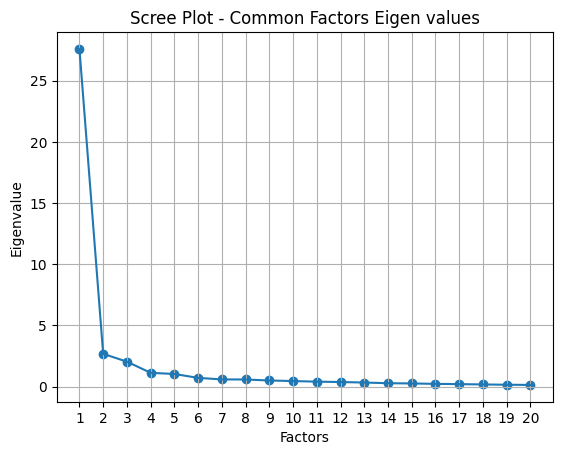

In [10]:
vizer.scree_plot(common_factors_ev, max_viz=20)

This is somewhat helpful, but choosing the number of factors is pretty hard and different folks will give different answers. An argument could be made for only 1 factor here. You could also argue that there is an "elbow" at 4, indicating we should choose 3 factors. Or maybe even an elbow at 6 and choose 5. How we choose here should include looking at what scale items would fall in each factor if we tried 3 or 5 factors. 

Another option is to use parallel analysis, which I'll try next. 

Factor eigenvalues for random data:
 [ 1.60918116  1.02797301  0.95541943  0.8569941   0.81506011  0.76758517
  0.72746478  0.69067942  0.65658434  0.62361998  0.59270001  0.56074959
  0.52927692  0.49874976  0.47298288  0.44617042  0.41817368  0.39442892
  0.36919119  0.34665185  0.32489536  0.30145365  0.28018429  0.26097789
  0.23626359  0.21464366  0.191758    0.17311906  0.1543368   0.13507748
  0.11766892  0.09732092  0.07763032  0.0583019   0.04286544  0.02468722
  0.00572155 -0.00947813 -0.0261237  -0.04371117 -0.06289297 -0.07988082
 -0.09428696 -0.11077955 -0.12770647 -0.14179803 -0.15897187 -0.17523648
 -0.19014712 -0.20429514 -0.21870296 -0.23452657 -0.24972461 -0.26623603
 -0.28050472 -0.29664769 -0.30970585 -0.323368   -0.33948452 -0.35191964
 -0.36581511 -0.38230446 -0.39806395 -0.41256116 -0.42552828 -0.44127225
 -0.45578161 -0.4705729  -0.48674302 -0.5017764  -0.5183638  -0.53260028
 -0.5476934  -0.56516319 -0.5868306  -0.6114981 ]
Factor eigenvalues for real data:
 [2

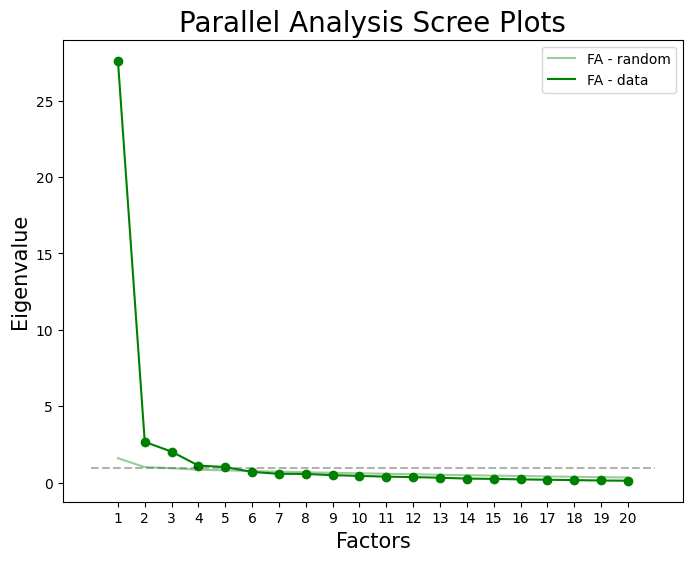

np.int64(5)

In [11]:
modeler.parallel_analysis(
    df_efa, K=50, print_eigenvalues=True, show_scree_plot=True, max_scree_factors=20
)

Our parallel analysis suggests 5 factors. 5 is still very close to the factors on random data, so we may choose fewer.

Next, we will re-run the factor analysis with a fixed number of factors, and examine the factor loadings. We will run for 1, 2, 3, 4, and 5 factor solutions. 

Getting factor solution for 1 factors.



c:\Users\renee\repos\scaledev\.venv\Lib\site-packages\factor_analyzer\factor_analyzer.py:663: UserWarning: No rotation will be performed when the number of factors equals 1.
  warnings.warn(


Factor loadings for a 1 factor solution:


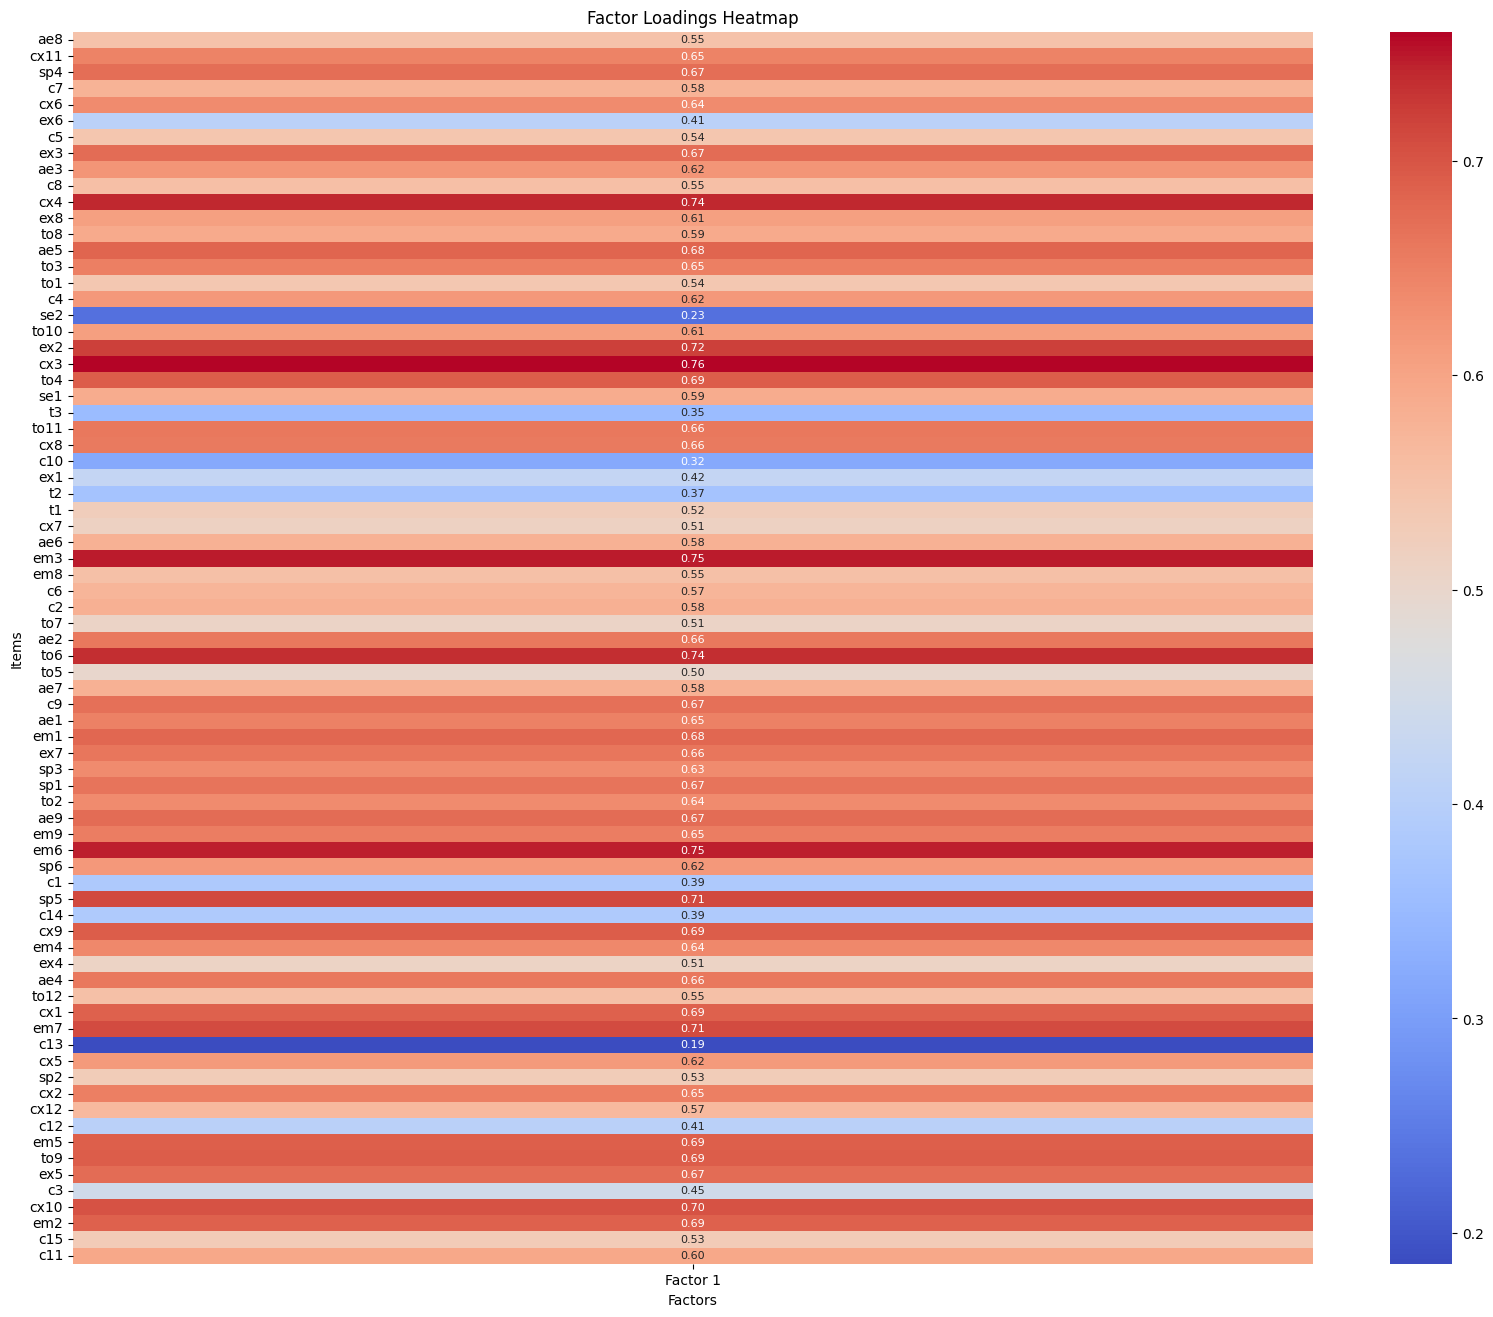

Getting factor solution for 2 factors.

Factor loadings for a 2 factor solution:


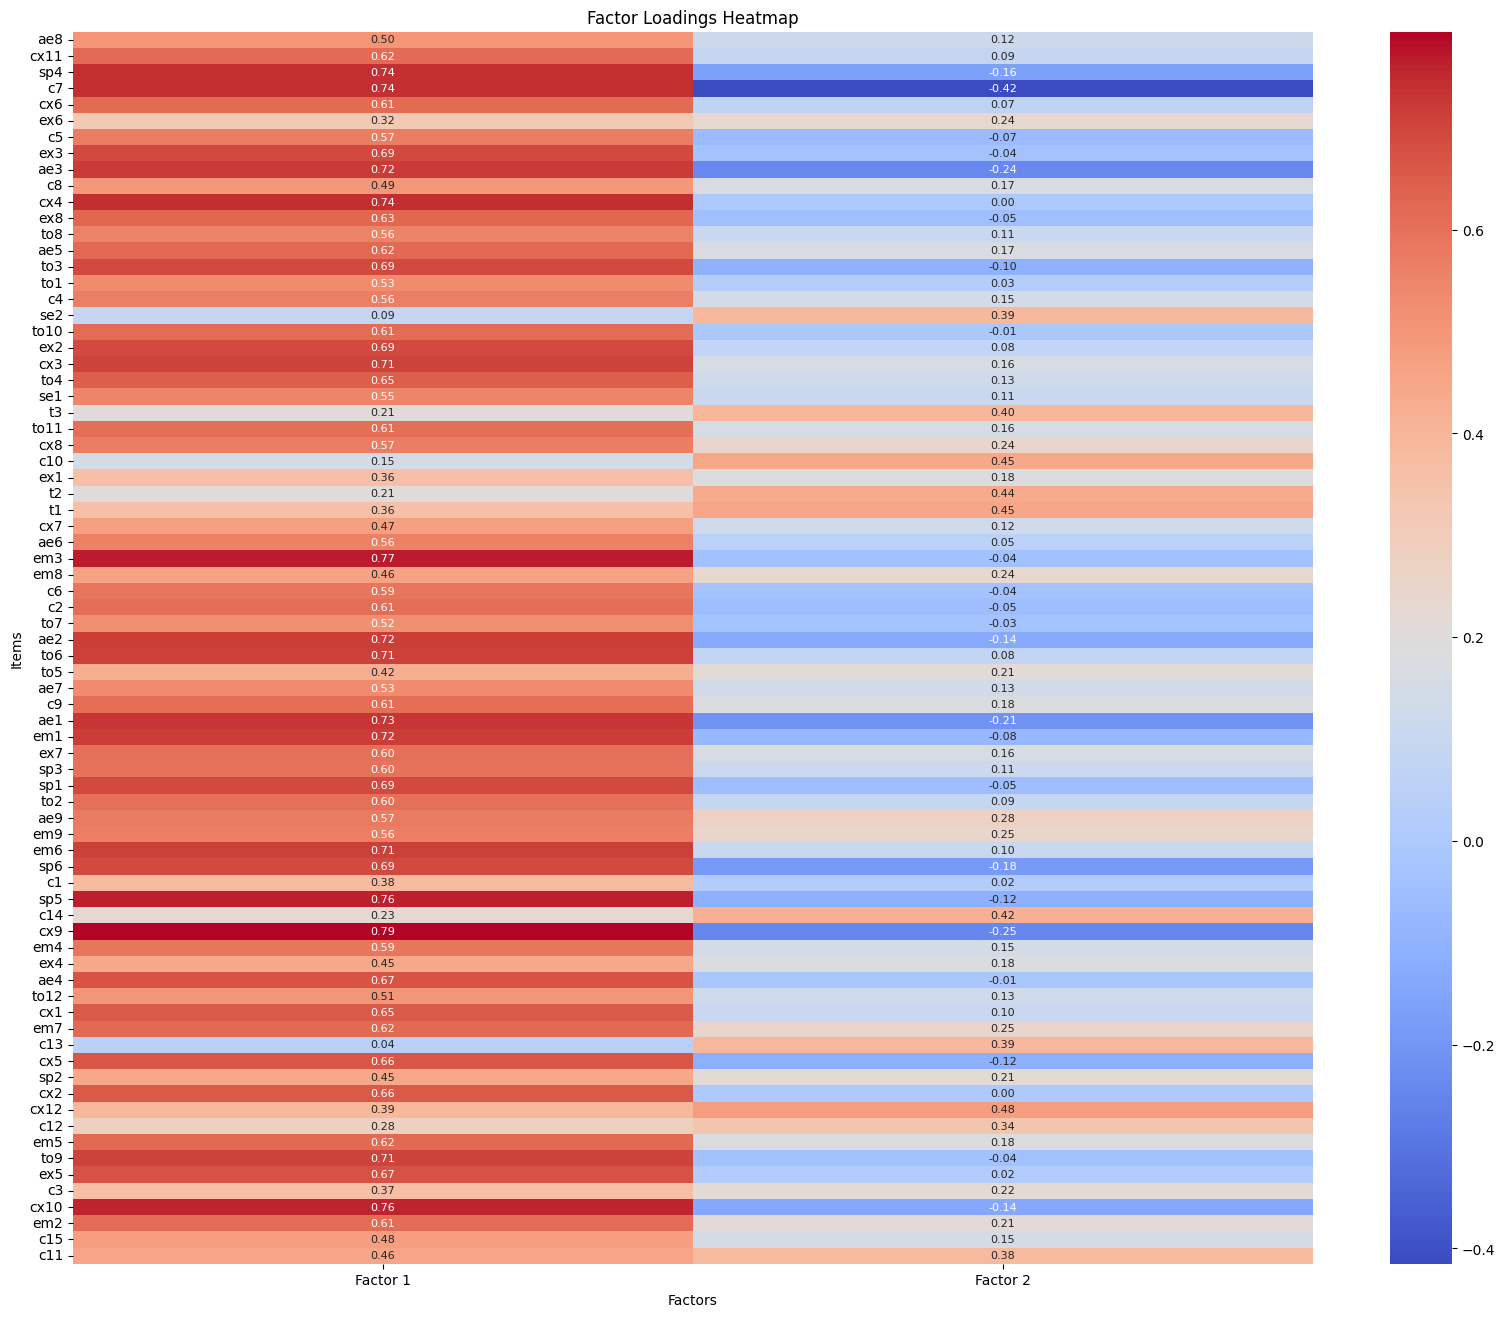

Getting factor solution for 3 factors.

Factor loadings for a 3 factor solution:


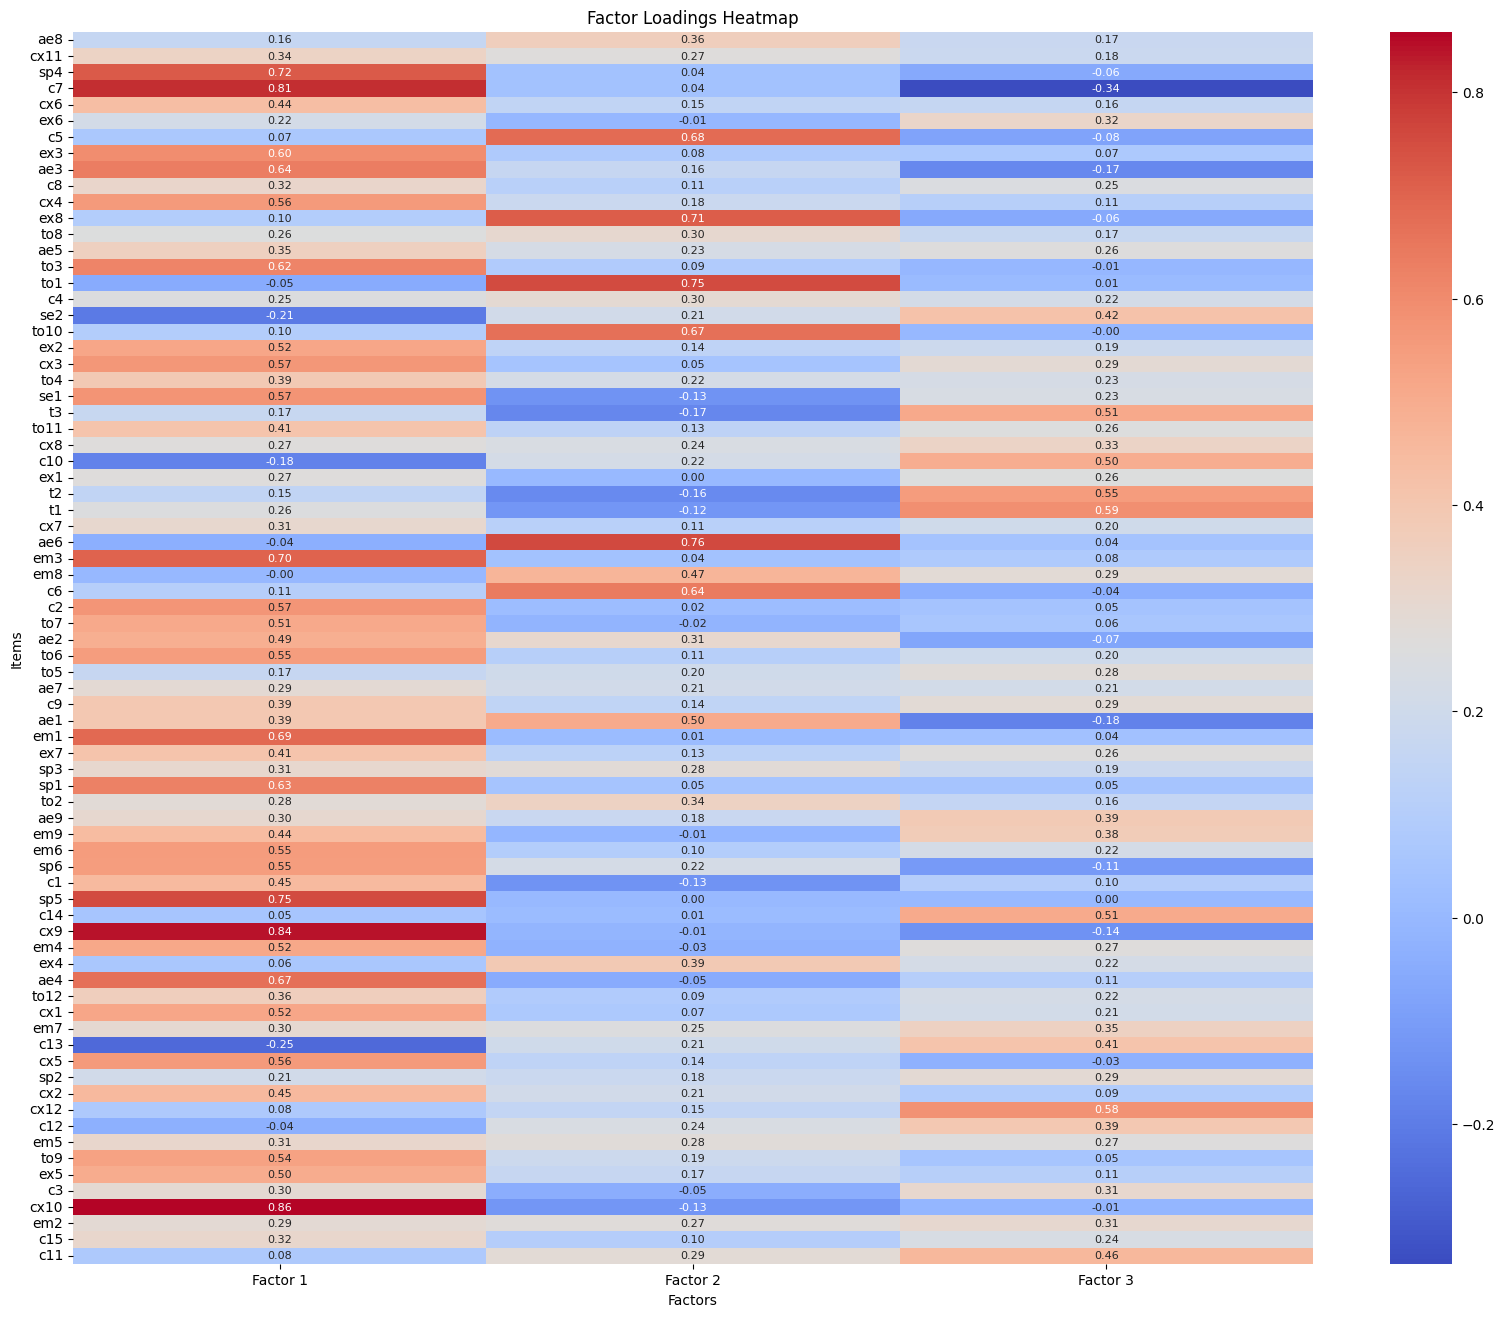

Getting factor solution for 4 factors.

Factor loadings for a 4 factor solution:


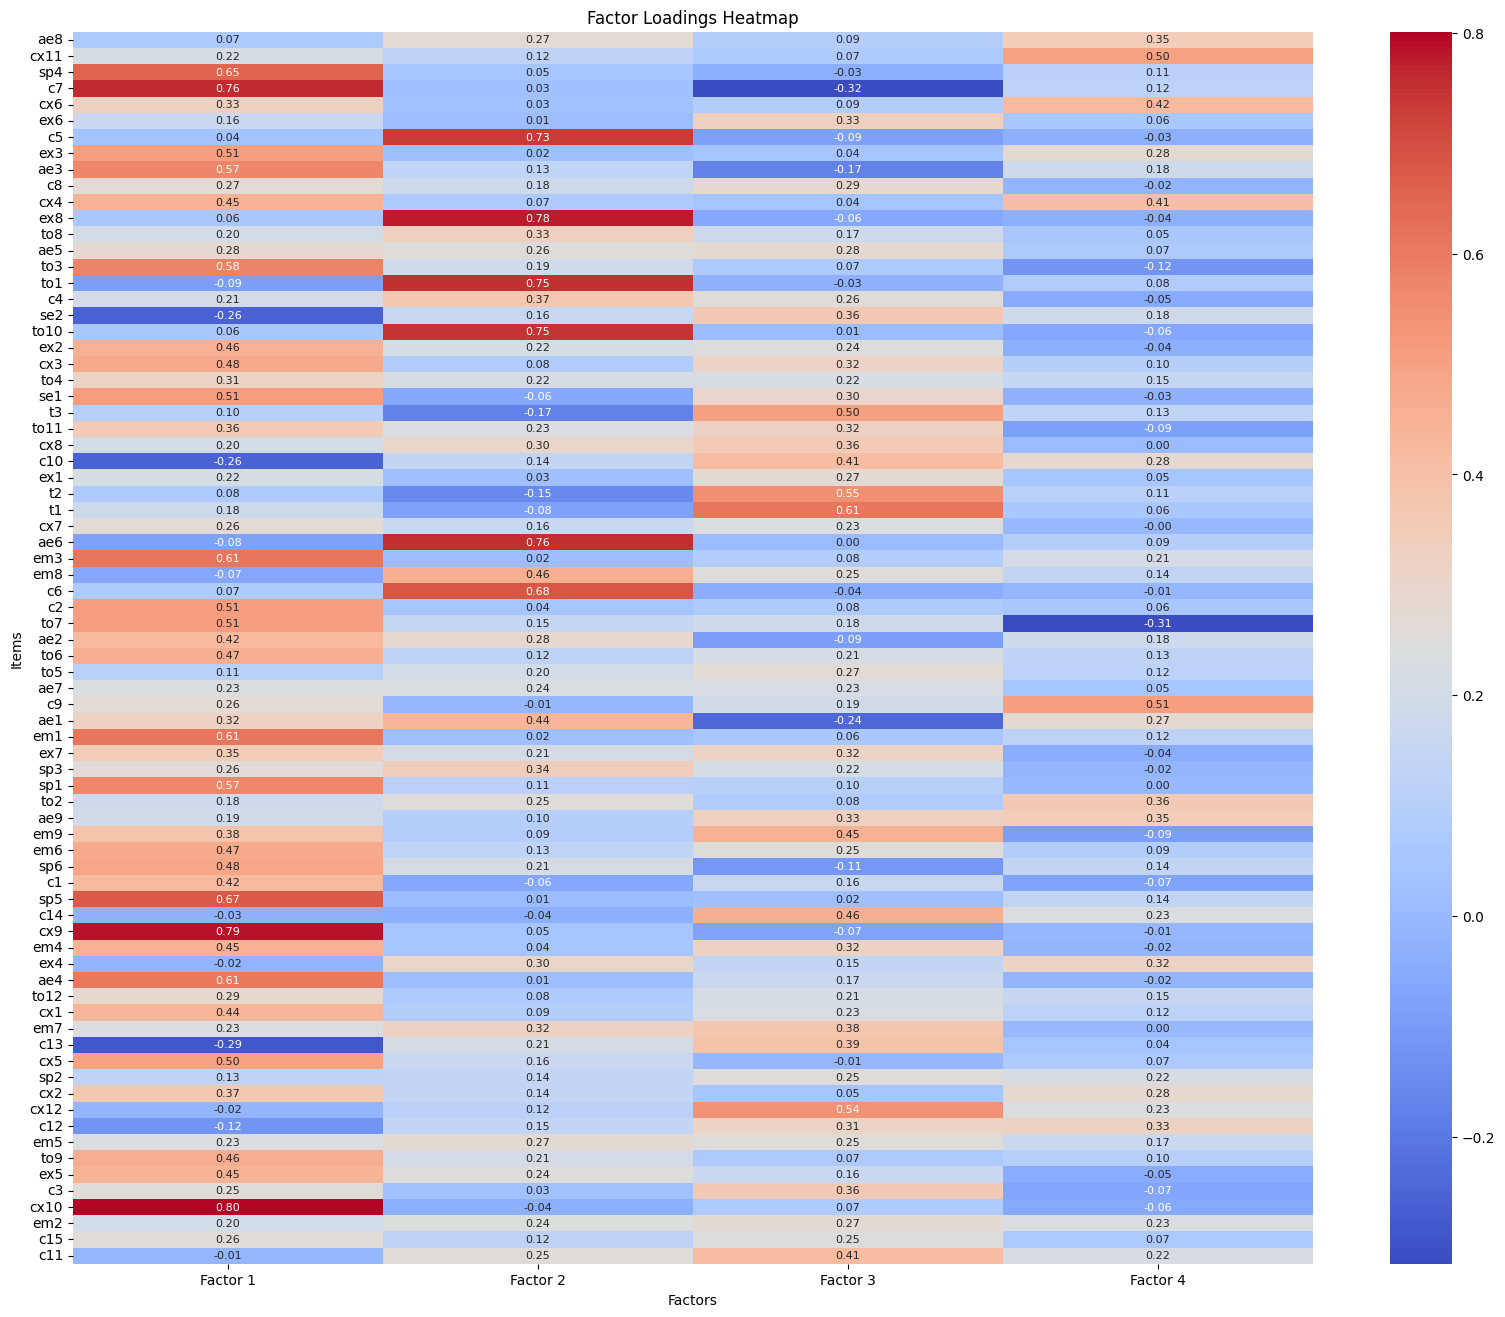

Getting factor solution for 5 factors.

Factor loadings for a 5 factor solution:


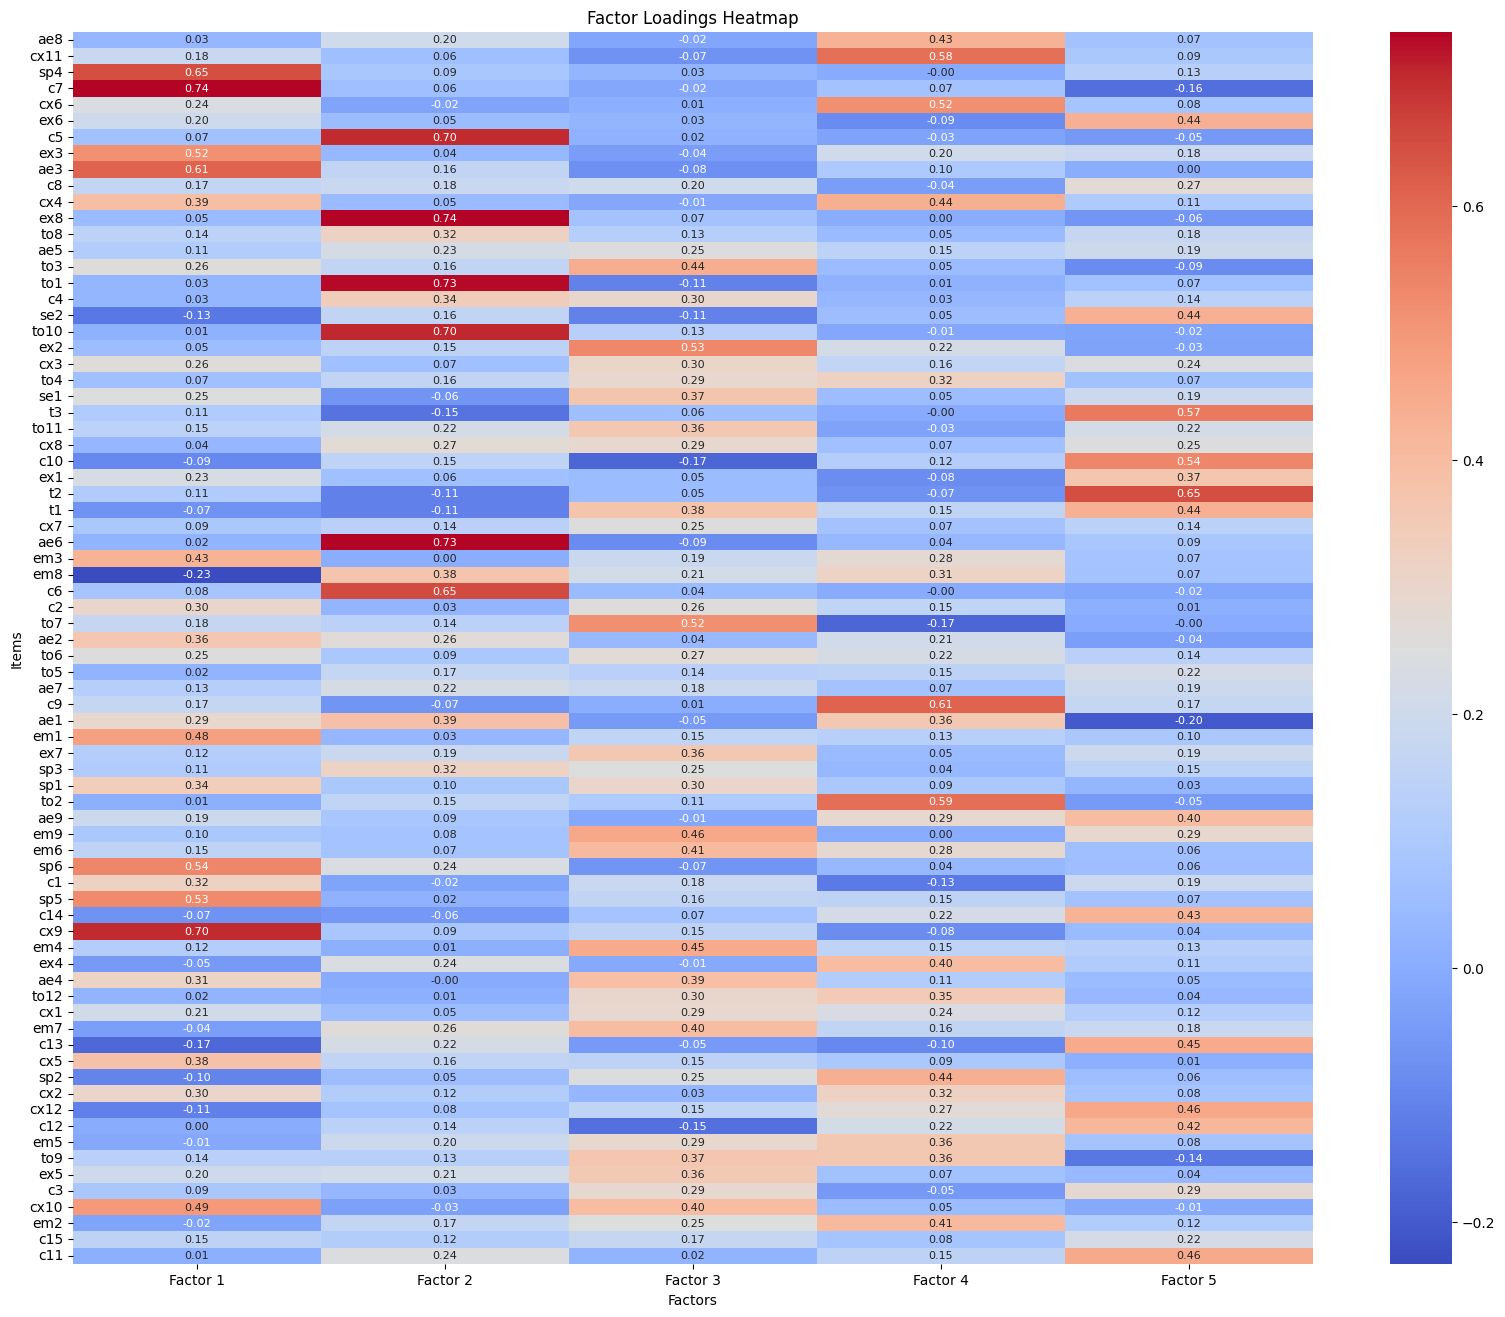

In [12]:
for f in range(1, 6):
    print(f"Getting factor solution for {f} factors.\n")
    fixed_efa = modeler.efa(df=df_efa, n_factors=f)

    print(f"Factor loadings for a {f} factor solution:")

    vizer.plot_loadings_heatmap(
        loadings=fixed_efa.loadings_,
        item_names=df_efa.columns,
        factor_names=[f"Factor {i + 1}" for i in range(fixed_efa.n_factors)],
    )

Ok, so we still have a lot of features, which makes the task of looking at them to decide on the number of factors to use a bit of a task. Lets look at what items have consistently low loadings and start removing those. We will do this for each potential factor solution. 

# Explore the 5 factor solution. 
Remove items until we have none with low loadings. 

In [13]:
# EFA with all features
efa_5_factor_v1 = modeler.efa(df=df_efa, n_factors=5)
efa_5_low_loadings_v1 = modeler.get_items_with_low_loadings(
    efa_5_factor_v1.loadings_, df_efa.columns, threshold=0.4
)
print("First round of low loadings to remove from the 5 factor solution: ")
print(efa_5_low_loadings_v1)

First round of low loadings to remove from the 5 factor solution: 
['c8', 'to8', 'ae5', 'c4', 'cx3', 'to4', 'se1', 'to11', 'cx8', 'ex1', 'cx7', 'em8', 'c2', 'ae2', 'to6', 'to5', 'ae7', 'ae1', 'ex7', 'sp3', 'sp1', 'ae9', 'c1', 'ex4', 'ae4', 'to12', 'cx1', 'cx5', 'cx2', 'em5', 'to9', 'ex5', 'c3', 'c15']


Let's re-run, dropping the items with low loadings. We can keep doing this until we no longer end up with items that have low loadings. 

Items with low loadings: 
['cx4', 'c14', 'em2']


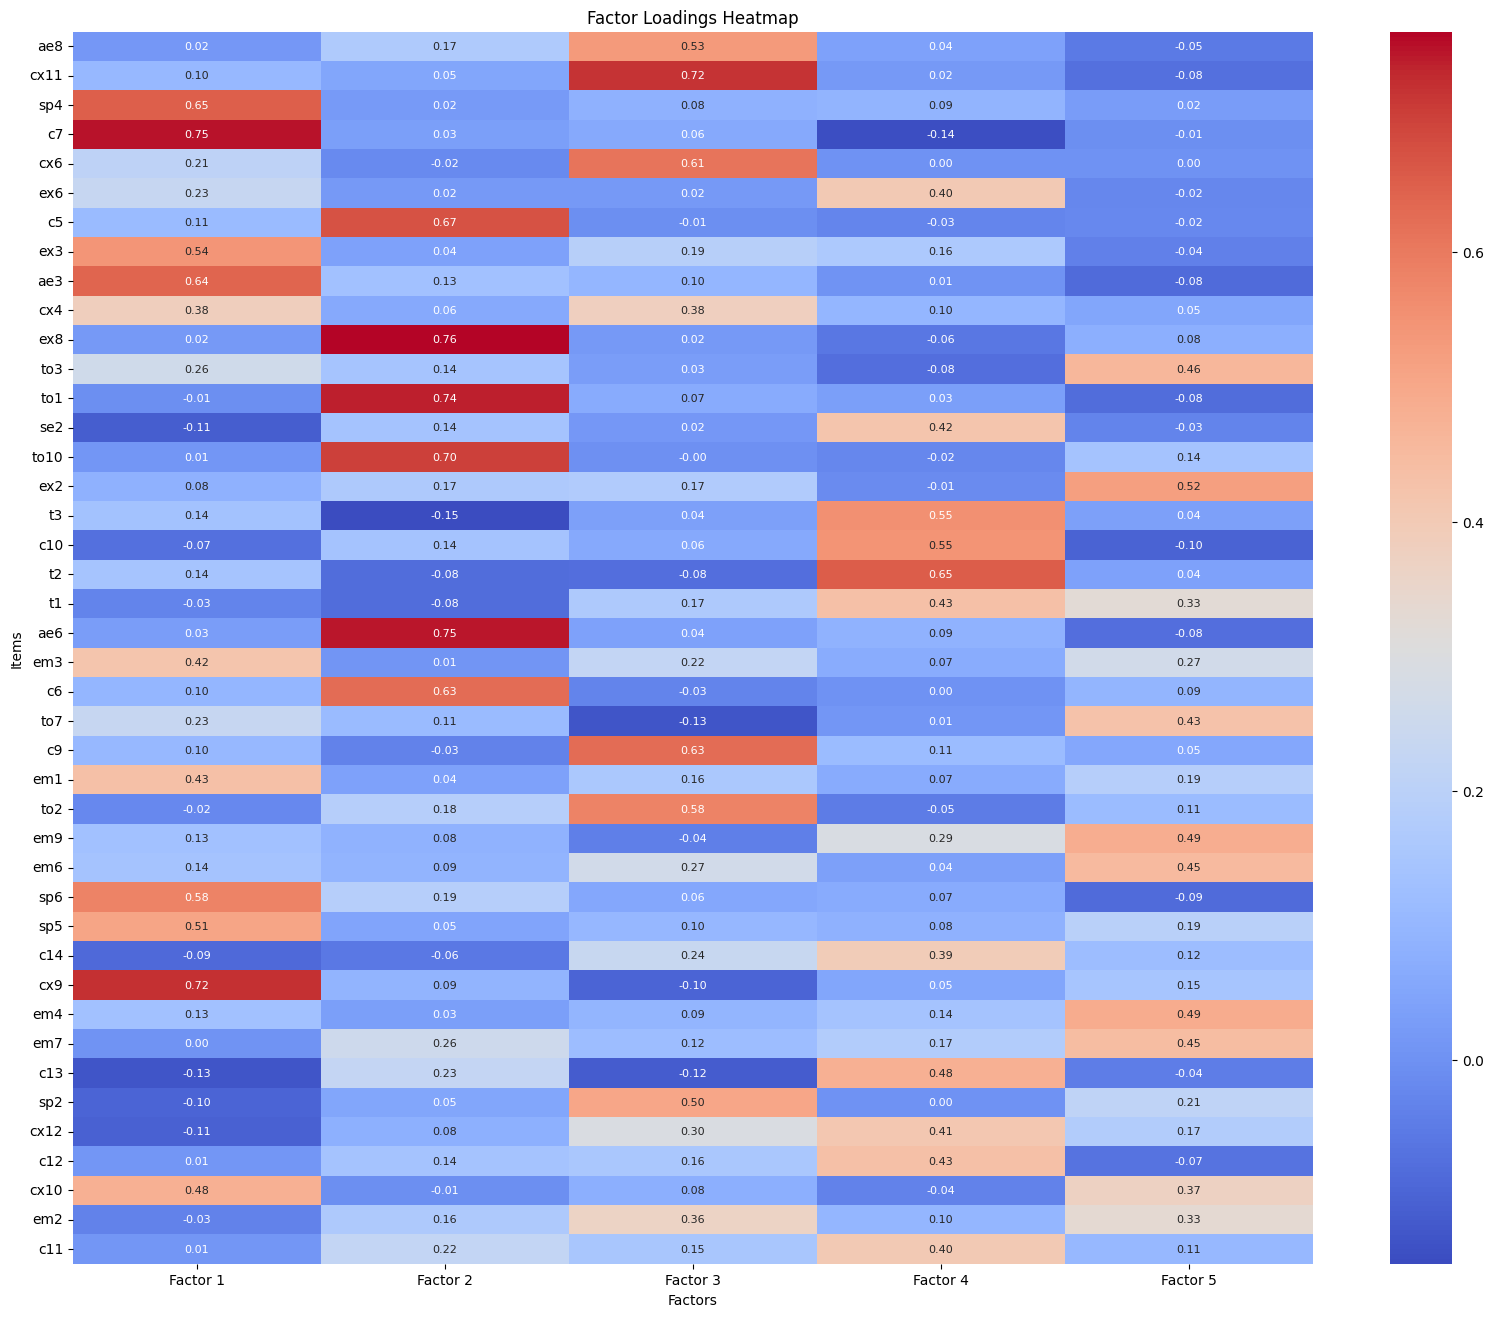

In [14]:
df_5_factor_v2 = df_efa.drop(columns=efa_5_low_loadings_v1)
efa_5_factor_v2 = modeler.efa(df=df_5_factor_v2, n_factors=5)

efa_5_low_loadings_v2 = modeler.get_items_with_low_loadings(
    efa_5_factor_v2.loadings_, df_5_factor_v2.columns, threshold=0.4
)
print("Items with low loadings: ")
print(efa_5_low_loadings_v2)

vizer.plot_loadings_heatmap(
    loadings=efa_5_factor_v2.loadings_,
    item_names=df_5_factor_v2.columns,
    factor_names=[f"Factor {i + 1}" for i in range(efa_5_factor_v2.n_factors)],
)

We still have some low loadings. Keep going.

Items with low loadings: 
[]


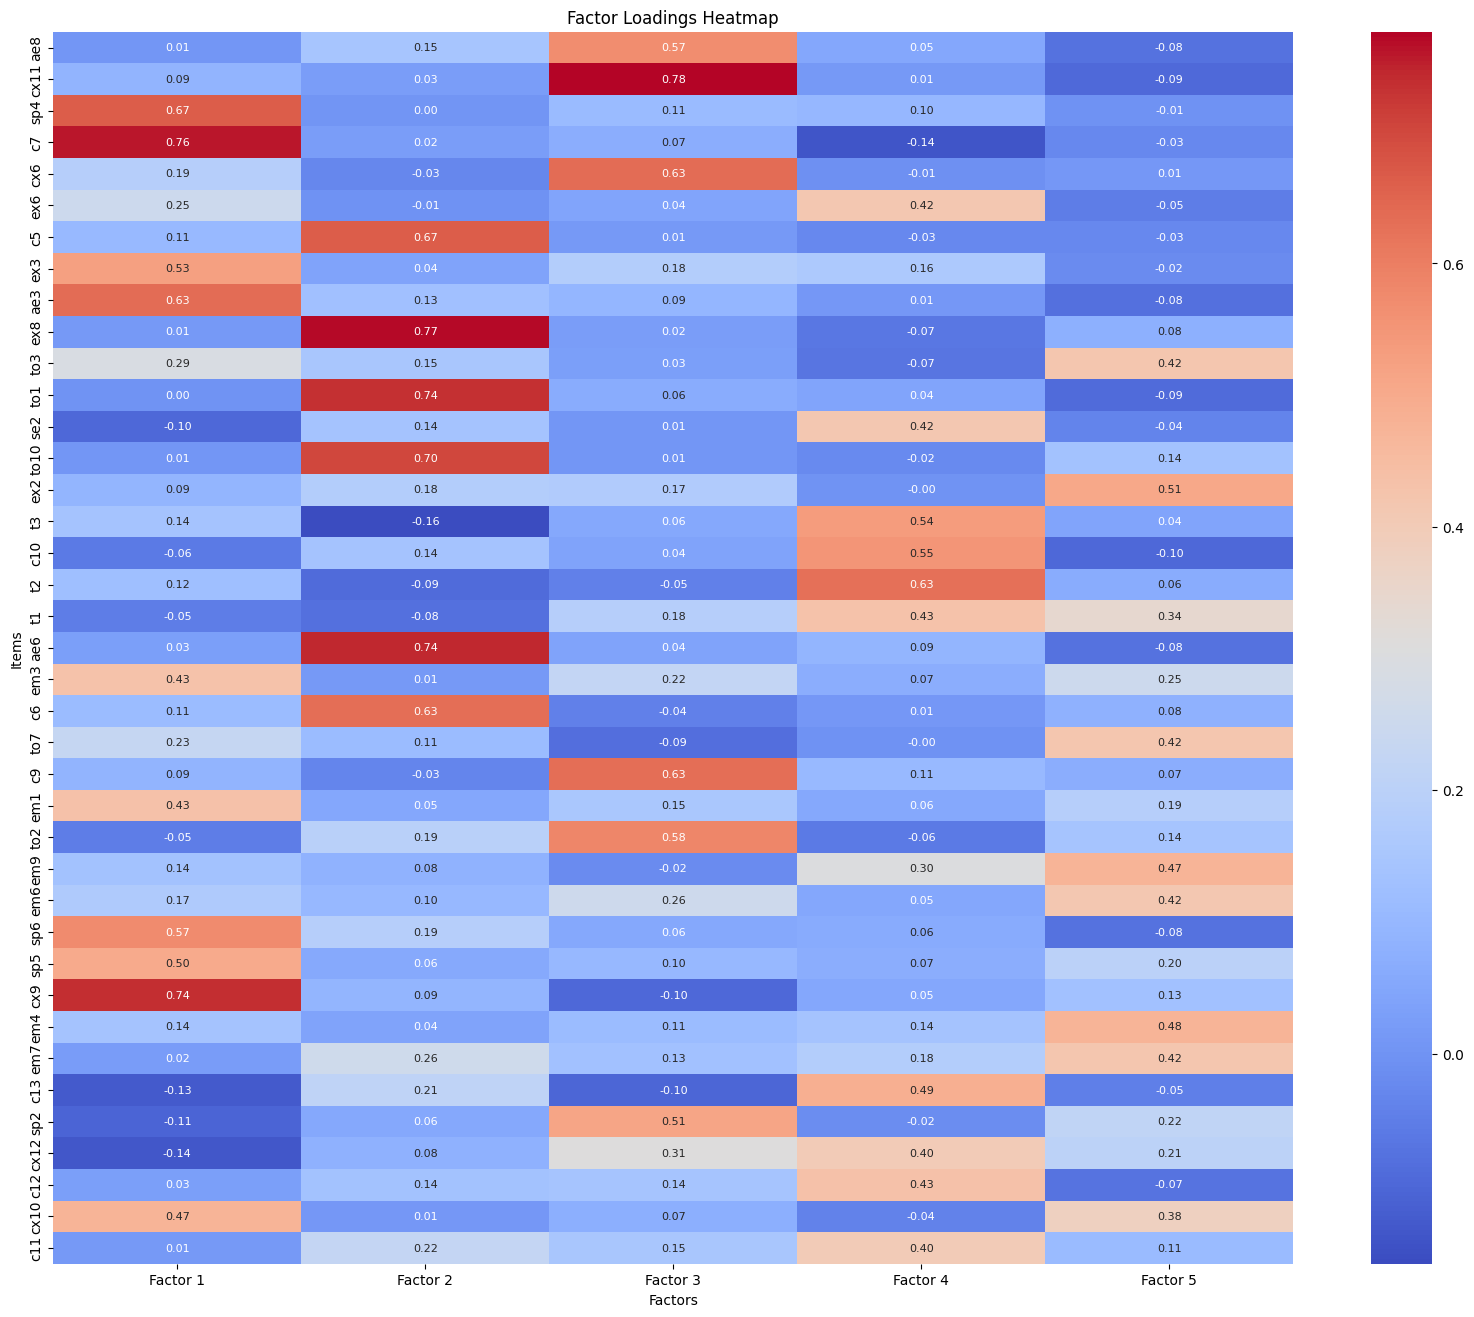

In [15]:
df_5_factor_v3 = df_5_factor_v2.drop(columns=efa_5_low_loadings_v2)
efa_5_factor_v3 = modeler.efa(df=df_5_factor_v3, n_factors=5)

efa_5_low_loadings_v3 = modeler.get_items_with_low_loadings(
    efa_5_factor_v3.loadings_, df_5_factor_v3.columns, threshold=0.4
)
print("Items with low loadings: ")
print(efa_5_low_loadings_v3)

vizer.plot_loadings_heatmap(
    loadings=efa_5_factor_v3.loadings_,
    item_names=df_5_factor_v3.columns,
    factor_names=[f"Factor {i + 1}" for i in range(efa_5_factor_v3.n_factors)],
)

No more low loadings! Here are the items for this solution (before we do any additional filtering):

In [16]:
df_strongest_loadings = modeler.strongest_loadings(
    efa_5_factor_v3.loadings_, df_5_factor_v3.columns
)

# add in the question text
df_question_txt = pd.read_excel(data_loc / "ets_question_text_map.xlsx")
df_strongest_loadings = pd.merge(
    df_strongest_loadings, df_question_txt, on="item", how="left"
)
df_strongest_loadings

,item,strongest_factor,loading,item_text
0,c7,1,0.75942,My life has purpose and meaning to me.
1,cx9,1,0.73902,I feel a sense of belonging.
2,sp4,1,0.66542,I feel a profound sense of belonging.
3,ae3,1,0.63376,I have the feeling of being cared for.
4,sp6,1,0.57453,I feel unconditional love.
5,ex3,1,0.52580,I feel like I am a part of something grand.
6,sp5,1,0.50125,I feel a profound sense of joy.
7,cx10,1,0.47340,I feel fully aligned with life.
8,em1,1,0.43493,I experience a calm feeling in my heart.
9,em3,1,0.43094,I experience a sense of aliveness.


Here is a correlation matrix to review, which can be helpful in deciding what additional items we might want to remove. For example, we may want to remove an item if it is highly correlated with another item. 

In [17]:
vizer.corr_matrix(df=df_5_factor_v3, cols=df_5_factor_v3.columns)

,ae8,cx11,sp4,c7,cx6,ex6,c5,ex3,ae3,ex8,to3,to1,se2,to10,ex2,t3,c10,t2,t1,ae6,em3,c6,to7,c9,em1,to2,em9,em6,sp6,sp5,cx9,em4,em7,c13,sp2,cx12,c12,cx10,c11
ae8,1.000000,0.630478,0.423197,0.275144,0.402250,0.305331,0.378085,0.334398,0.310404,0.341001,0.294056,0.387727,0.125610,0.324736,0.350963,0.207727,0.147418,0.226878,0.302548,0.384560,0.406660,0.301873,0.235392,0.412346,0.337385,0.449181,0.291908,0.414437,0.347764,0.328911,0.273266,0.324687,0.356838,0.154191,0.312443,0.313978,0.243583,0.269245,0.332105
cx11,0.630478,1.000000,0.491129,0.411462,0.560276,0.310214,0.362569,0.441785,0.395055,0.392641,0.332551,0.372552,0.140089,0.392979,0.407873,0.246394,0.211778,0.221583,0.339819,0.370884,0.493305,0.327530,0.217533,0.615059,0.438512,0.524801,0.361452,0.449911,0.377466,0.434712,0.376461,0.388459,0.414088,0.104055,0.402882,0.386874,0.295792,0.370938,0.402392
sp4,0.423197,0.491129,1.000000,0.593289,0.432747,0.366704,0.369618,0.542584,0.553496,0.346378,0.487238,0.347291,0.127126,0.364956,0.434138,0.246494,0.123451,0.216303,0.240321,0.306224,0.532984,0.356736,0.335550,0.428872,0.461387,0.324217,0.426694,0.516996,0.514194,0.519880,0.611291,0.399357,0.451846,0.096669,0.291915,0.283784,0.236934,0.519234,0.353649
c7,0.275144,0.411462,0.593289,1.000000,0.444121,0.192071,0.397889,0.546310,0.531735,0.334366,0.414128,0.282027,-0.023857,0.323926,0.408417,0.060404,0.024232,0.076209,0.170476,0.308954,0.534247,0.342128,0.315478,0.314418,0.451231,0.315799,0.305422,0.375404,0.490076,0.505836,0.613566,0.378523,0.341624,-0.024067,0.208240,0.157949,0.141952,0.503251,0.239704
cx6,0.402250,0.560276,0.432747,0.444121,1.000000,0.303893,0.373352,0.511406,0.455588,0.306949,0.373720,0.327509,0.128106,0.358493,0.409703,0.244523,0.169648,0.216777,0.307087,0.369229,0.512071,0.282424,0.235927,0.543293,0.416083,0.526915,0.324493,0.478222,0.417274,0.412754,0.416293,0.408885,0.452025,0.052665,0.496397,0.424004,0.286166,0.427465,0.333515
ex6,0.305331,0.310214,0.366704,0.192071,0.303893,1.000000,0.185503,0.309620,0.236107,0.171724,0.200256,0.222406,0.148599,0.195498,0.221233,0.276342,0.298170,0.349194,0.330233,0.246543,0.314170,0.188901,0.206262,0.210025,0.231558,0.232640,0.356473,0.292253,0.251683,0.274049,0.301843,0.252928,0.277150,0.165214,0.183613,0.293804,0.285659,0.266174,0.245571
c5,0.378085,0.362569,0.369618,0.397889,0.373352,0.185503,1.000000,0.437509,0.407954,0.576248,0.358948,0.485390,0.107603,0.561123,0.378394,0.034713,0.117644,0.128593,0.197512,0.556971,0.336158,0.502562,0.289445,0.241840,0.284864,0.374311,0.337860,0.326292,0.329441,0.335607,0.337444,0.279563,0.392648,0.171966,0.243329,0.198568,0.234748,0.305463,0.349502
ex3,0.334398,0.441785,0.542584,0.546310,0.511406,0.309620,0.437509,1.000000,0.564404,0.356407,0.351757,0.327962,0.126050,0.333105,0.431666,0.274932,0.174292,0.250458,0.328348,0.375727,0.519286,0.373023,0.285451,0.440340,0.486868,0.410002,0.435480,0.461332,0.454183,0.510421,0.515078,0.397932,0.414419,0.101530,0.343164,0.406795,0.257678,0.516472,0.406892
ae3,0.310404,0.395055,0.553496,0.531735,0.455588,0.236107,0.407954,0.564404,1.000000,0.408846,0.382858,0.350866,0.063123,0.365749,0.399074,0.198217,0.141741,0.153591,0.203022,0.383791,0.494503,0.364756,0.303086,0.405536,0.472721,0.396234,0.371040,0.472995,0.591348,0.485377,0.550776,0.315133,0.381390,0.009035,0.255460,0.239001,0.208291,0.479462,0.272267
ex8,0.341001,0.392641,0.346378,0.334366,0.306949,0.171724,0.576248,0.356407,0.408846,1.000000,0.370608,0.596968,0.098625,0.652908,0.441013,0.113011,0.164910,0.122101,0.222868,0.594368,0.391061,0.545752,0.293153,0.353807,0.366984,0.466758,0.320174,0.426034,0.436208,0.428245,0.409509,0.324653,0.425163,0.117064,0.283620,0.274779,0.219054,0.372072,0.376370


# Explore 4 factor solution
Lets follow the same process as above, but for a 4 factor solution. 

In [18]:
# EFA with all features
efa_4_factor_v1 = modeler.efa(df=df_efa, n_factors=4)
efa_4_low_loadings_v1 = modeler.get_items_with_low_loadings(
    efa_4_factor_v1.loadings_, df_efa.columns, threshold=0.4
)
print("First round of low loadings to remove from the 5 factor solution: ")
print(efa_4_low_loadings_v1)

First round of low loadings to remove from the 5 factor solution: 
['ae8', 'ex6', 'c8', 'to8', 'ae5', 'c4', 'se2', 'to4', 'to11', 'cx8', 'ex1', 'cx7', 'to5', 'ae7', 'ex7', 'sp3', 'to2', 'ae9', 'ex4', 'to12', 'em7', 'c13', 'sp2', 'cx2', 'c12', 'em5', 'c3', 'em2', 'c15']


Run the 4 factor solution dropping the first round of low loading items

Items with low loadings: 
['to3', 'ex2', 'cx3', 'se1', 'c2', 'to6', 'sp1', 'em9', 'em6', 'c1', 'em4', 'ae4', 'cx1', 'to9', 'ex5']


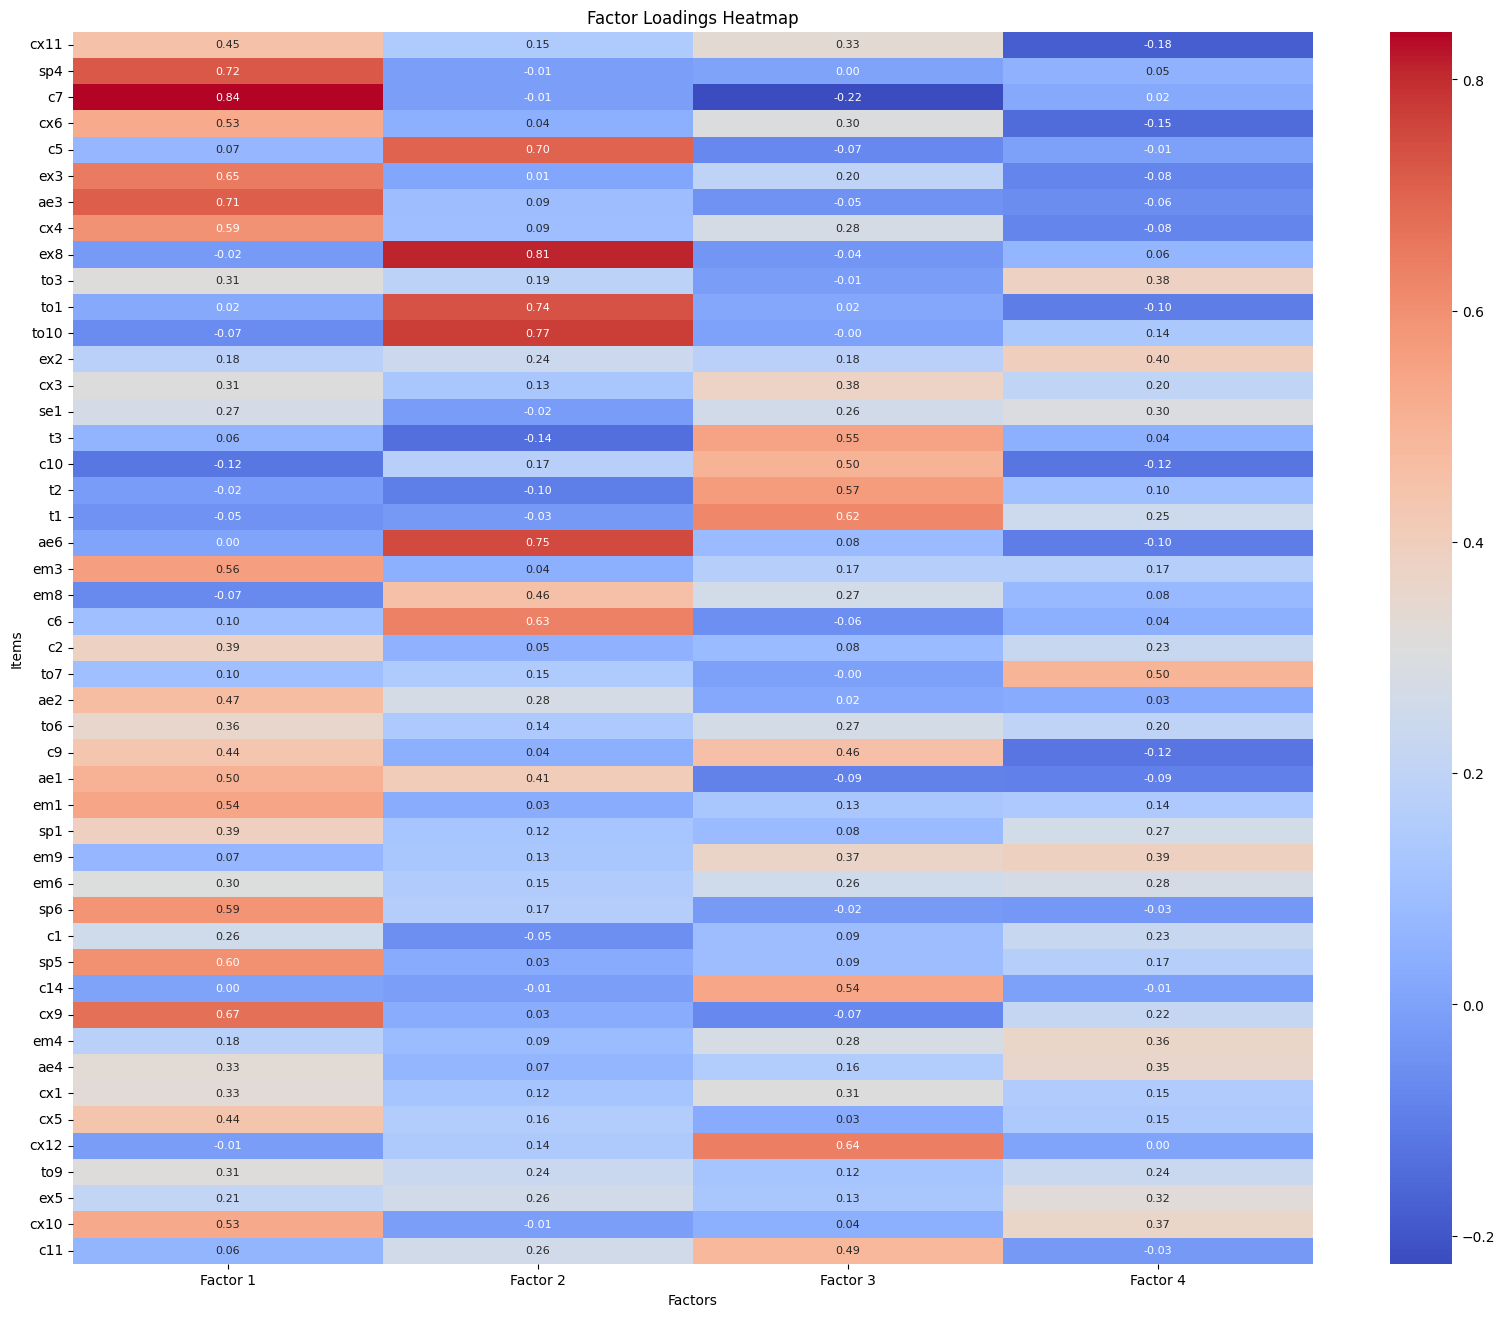

In [19]:
df_4_factor_v2 = df_efa.drop(columns=efa_4_low_loadings_v1)
efa_4_factor_v2 = modeler.efa(df=df_4_factor_v2, n_factors=4)

efa_4_low_loadings_v2 = modeler.get_items_with_low_loadings(
    efa_4_factor_v2.loadings_, df_4_factor_v2.columns, threshold=0.4
)
print("Items with low loadings: ")
print(efa_4_low_loadings_v2)

vizer.plot_loadings_heatmap(
    loadings=efa_4_factor_v2.loadings_,
    item_names=df_4_factor_v2.columns,
    factor_names=[f"Factor {i + 1}" for i in range(efa_4_factor_v2.n_factors)],
)

Another round removing low loadings

Items with low loadings: 
['cx6', 'ae1', 'c11']


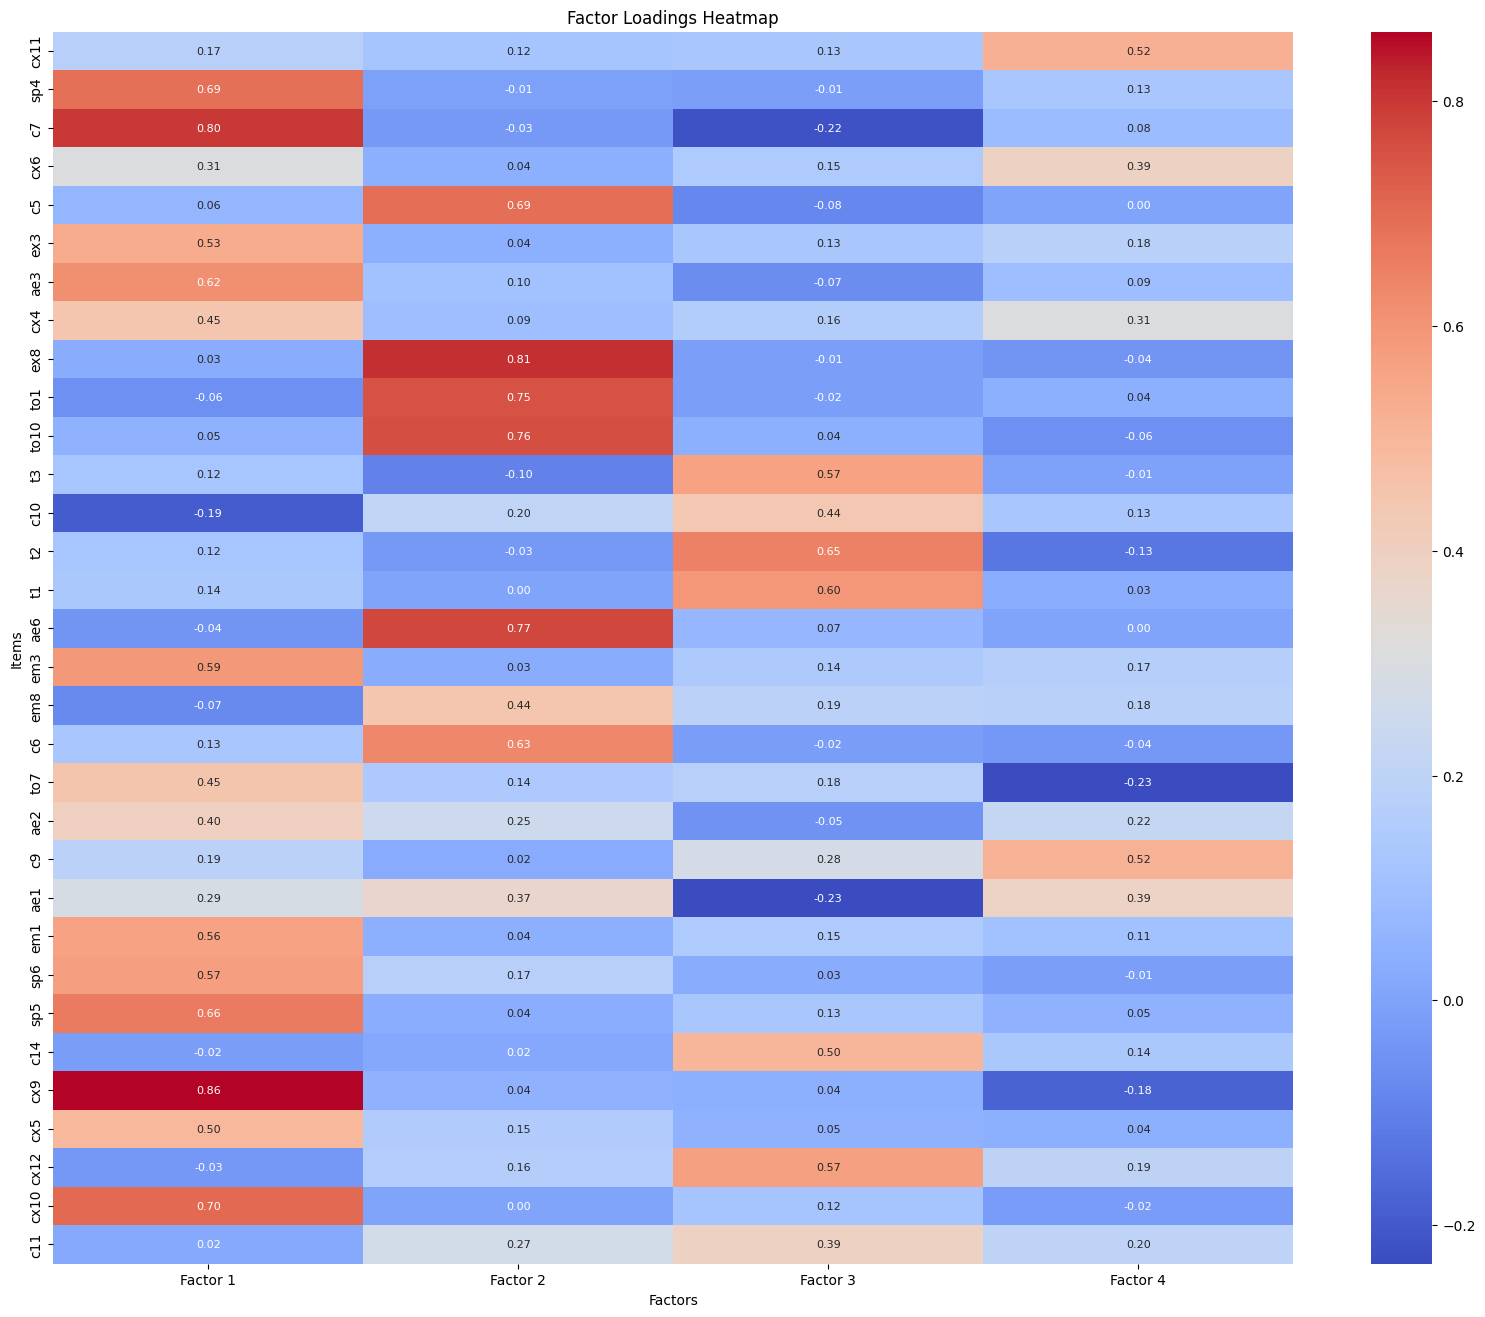

In [20]:
# Remove the items with low loadings from the 5 factor solution
df_4_factor_v3 = df_4_factor_v2.drop(columns=efa_4_low_loadings_v2)
# re-run with 5 factors on the reduced dataset
efa_4_factor_v3 = modeler.efa(df=df_4_factor_v3, n_factors=4)

efa_4_low_loadings_v3 = modeler.get_items_with_low_loadings(
    efa_4_factor_v3.loadings_, df_4_factor_v3.columns, threshold=0.4
)
print("Items with low loadings: ")
print(efa_4_low_loadings_v3)

vizer.plot_loadings_heatmap(
    loadings=efa_4_factor_v3.loadings_,
    item_names=df_4_factor_v3.columns,
    factor_names=[f"Factor {i + 1}" for i in range(efa_4_factor_v3.n_factors)],
)

More to remove

Items with low loadings: 
[]


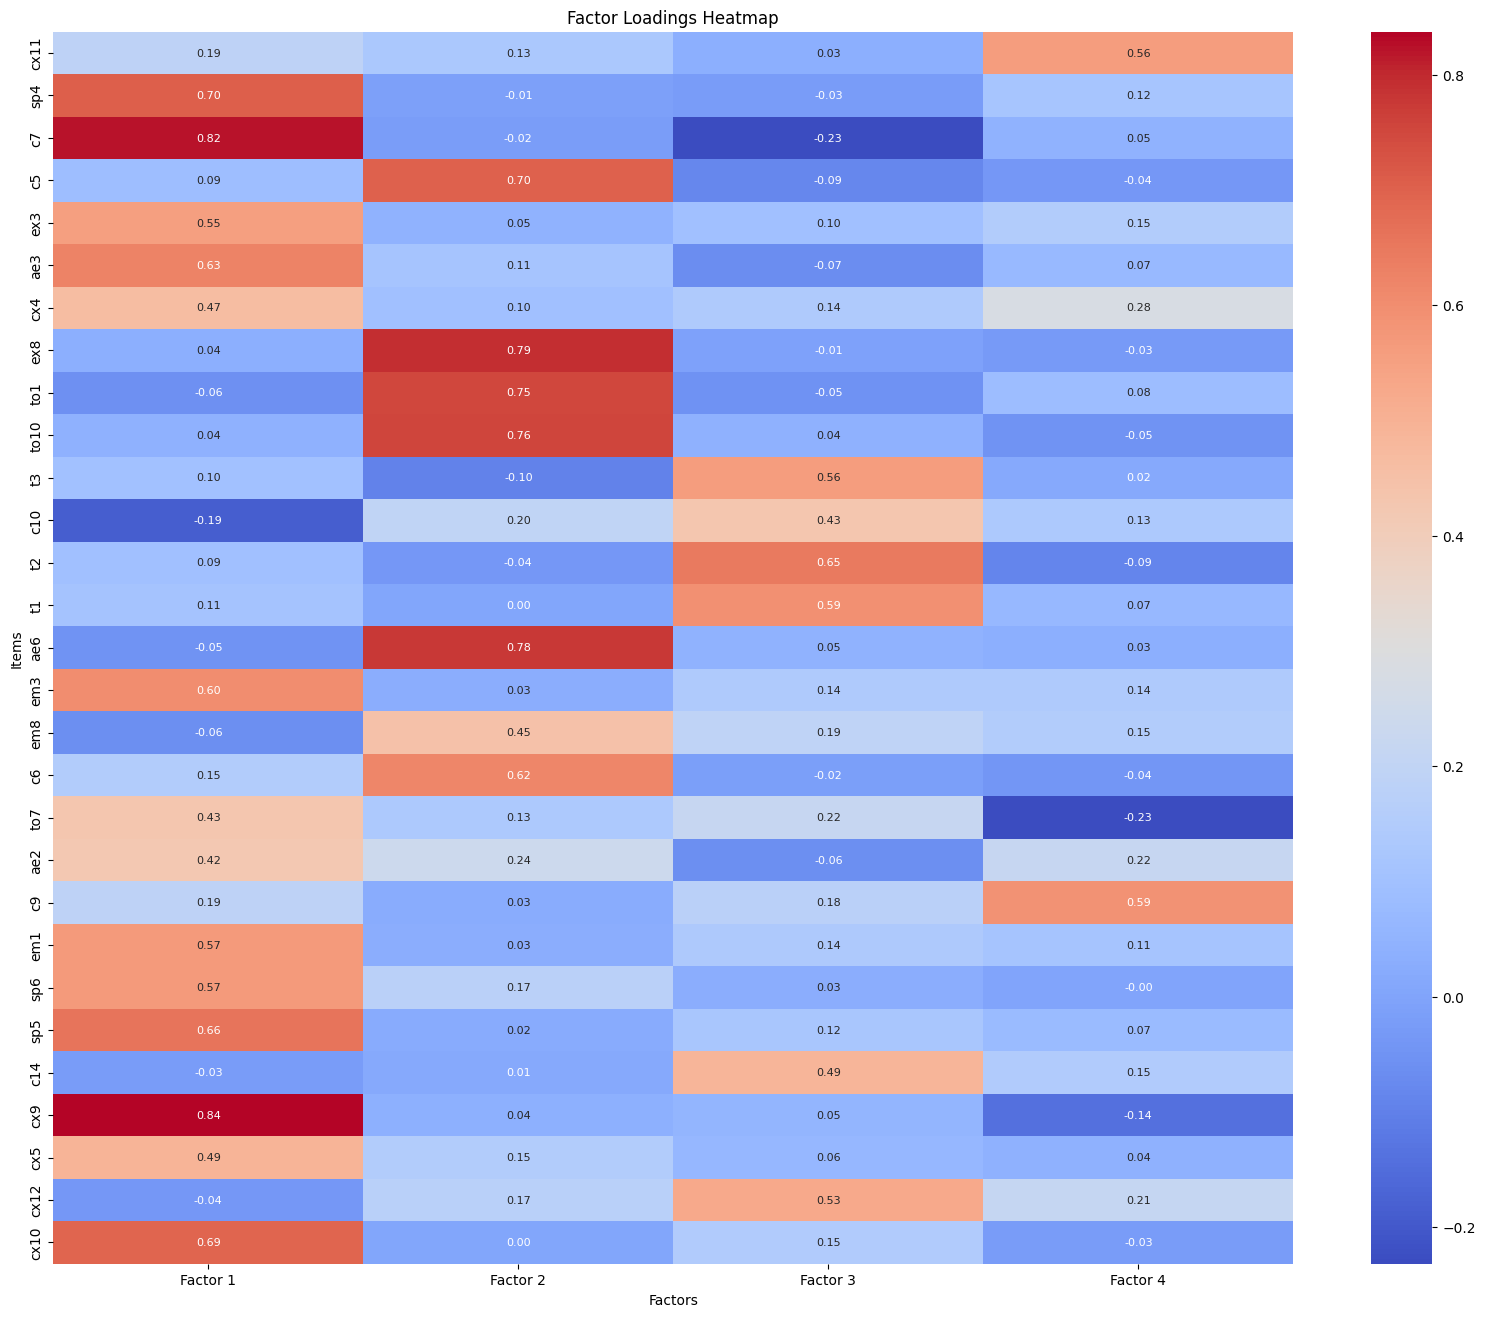

In [21]:
df_4_factor_v4 = df_4_factor_v3.drop(columns=efa_4_low_loadings_v3)

efa_4_factor_v4 = modeler.efa(df=df_4_factor_v4, n_factors=4)

efa_4_low_loadings_v4 = modeler.get_items_with_low_loadings(
    efa_4_factor_v4.loadings_, df_4_factor_v4.columns, threshold=0.4
)
print("Items with low loadings: ")
print(efa_4_low_loadings_v4)

vizer.plot_loadings_heatmap(
    loadings=efa_4_factor_v4.loadings_,
    item_names=df_4_factor_v4.columns,
    factor_names=[f"Factor {i + 1}" for i in range(efa_4_factor_v4.n_factors)],
)

There we go. Lets look at the items: 

In [22]:
df_strongest_loadings = modeler.strongest_loadings(
    efa_4_factor_v4.loadings_, df_4_factor_v4.columns
)

# add in the question text
df_question_txt = pd.read_excel(data_loc / "ets_question_text_map.xlsx")
df_strongest_loadings = pd.merge(
    df_strongest_loadings, df_question_txt, on="item", how="left"
)
df_strongest_loadings

,item,strongest_factor,loading,item_text
0,cx9,1,0.83734,I feel a sense of belonging.
1,c7,1,0.82281,My life has purpose and meaning to me.
2,sp4,1,0.70437,I feel a profound sense of belonging.
3,cx10,1,0.69369,I feel fully aligned with life.
4,sp5,1,0.65884,I feel a profound sense of joy.
5,ae3,1,0.62652,I have the feeling of being cared for.
6,em3,1,0.60227,I experience a sense of aliveness.
7,em1,1,0.56865,I experience a calm feeling in my heart.
8,sp6,1,0.56841,I feel unconditional love.
9,ex3,1,0.55384,I feel like I am a part of something grand.


Correlation matrix for the items in this solution: 

In [23]:
vizer.corr_matrix(df=df_4_factor_v4, cols=df_4_factor_v4.columns)

,cx11,sp4,c7,c5,ex3,ae3,cx4,ex8,to1,to10,t3,c10,t2,t1,ae6,em3,em8,c6,to7,ae2,c9,em1,sp6,sp5,c14,cx9,cx5,cx12,cx10
cx11,1.000000,0.491129,0.411462,0.362569,0.441785,0.395055,0.514320,0.392641,0.372552,0.392979,0.246394,0.211778,0.221583,0.339819,0.370884,0.493305,0.352744,0.327530,0.217533,0.486571,0.615059,0.438512,0.377466,0.434712,0.270354,0.376461,0.381945,0.386874,0.370938
sp4,0.491129,1.000000,0.593289,0.369618,0.542584,0.553496,0.506609,0.346378,0.347291,0.364956,0.246494,0.123451,0.216303,0.240321,0.306224,0.532984,0.259110,0.356736,0.335550,0.491092,0.428872,0.461387,0.514194,0.519880,0.163429,0.611291,0.472539,0.283784,0.519234
c7,0.411462,0.593289,1.000000,0.397889,0.546310,0.531735,0.485871,0.334366,0.282027,0.323926,0.060404,0.024232,0.076209,0.170476,0.308954,0.534247,0.215111,0.342128,0.315478,0.490325,0.314418,0.451231,0.490076,0.505836,0.051910,0.613566,0.430019,0.157949,0.503251
c5,0.362569,0.369618,0.397889,1.000000,0.437509,0.407954,0.377898,0.576248,0.485390,0.561123,0.034713,0.117644,0.128593,0.197512,0.556971,0.336158,0.412426,0.502562,0.289445,0.415975,0.241840,0.284864,0.329441,0.335607,0.106566,0.337444,0.319226,0.198568,0.305463
ex3,0.441785,0.542584,0.546310,0.437509,1.000000,0.564404,0.615844,0.356407,0.327962,0.333105,0.274932,0.174292,0.250458,0.328348,0.375727,0.519286,0.285969,0.373023,0.285451,0.449164,0.440340,0.486868,0.454183,0.510421,0.205974,0.515078,0.356355,0.406795,0.516472
ae3,0.395055,0.553496,0.531735,0.407954,0.564404,1.000000,0.532146,0.408846,0.350866,0.365749,0.198217,0.141741,0.153591,0.203022,0.383791,0.494503,0.275294,0.364756,0.303086,0.443642,0.405536,0.472721,0.591348,0.485377,0.110352,0.550776,0.460959,0.239001,0.479462
cx4,0.514320,0.506609,0.485871,0.377898,0.615844,0.532146,1.000000,0.417438,0.388365,0.410491,0.244362,0.248907,0.260069,0.391060,0.412639,0.574819,0.400795,0.404291,0.250208,0.499911,0.553756,0.538647,0.523696,0.576713,0.287972,0.530143,0.467757,0.437750,0.567714
ex8,0.392641,0.346378,0.334366,0.576248,0.356407,0.408846,0.417438,1.000000,0.596968,0.652908,0.113011,0.164910,0.122101,0.222868,0.594368,0.391061,0.388594,0.545752,0.293153,0.447348,0.353807,0.366984,0.436208,0.428245,0.165323,0.409509,0.376677,0.274779,0.372072
to1,0.372552,0.347291,0.282027,0.485390,0.327962,0.350866,0.388365,0.596968,1.000000,0.525749,0.102462,0.205710,0.098615,0.131794,0.638989,0.327105,0.334966,0.517719,0.206829,0.433638,0.325348,0.308298,0.371689,0.364571,0.141769,0.333538,0.319119,0.294520,0.306370
to10,0.392979,0.364956,0.323926,0.561123,0.333105,0.365749,0.410491,0.652908,0.525749,1.000000,0.092449,0.234943,0.132070,0.215898,0.565799,0.393382,0.457586,0.511510,0.354742,0.441729,0.348183,0.368179,0.415537,0.345826,0.144913,0.424129,0.448293,0.328892,0.404305


# Explore 3 Factor Solution

In [24]:
# EFA with all features
efa_3_factor_v1 = modeler.efa(df=df_efa, n_factors=3)
efa_3_low_loadings_v1 = modeler.get_items_with_low_loadings(
    efa_3_factor_v1.loadings_, df_efa.columns, threshold=0.4
)
print("First round of low loadings to remove from the 5 factor solution: ")
print(efa_3_low_loadings_v1)

First round of low loadings to remove from the 5 factor solution: 
['ae8', 'cx11', 'ex6', 'c8', 'to8', 'ae5', 'c4', 'to4', 'cx8', 'ex1', 'cx7', 'to5', 'ae7', 'c9', 'sp3', 'to2', 'ae9', 'ex4', 'to12', 'em7', 'sp2', 'c12', 'em5', 'c3', 'em2', 'c15']


Run the 3 factor solution dropping the first round of low loading items

Items with low loadings: 
['se2']


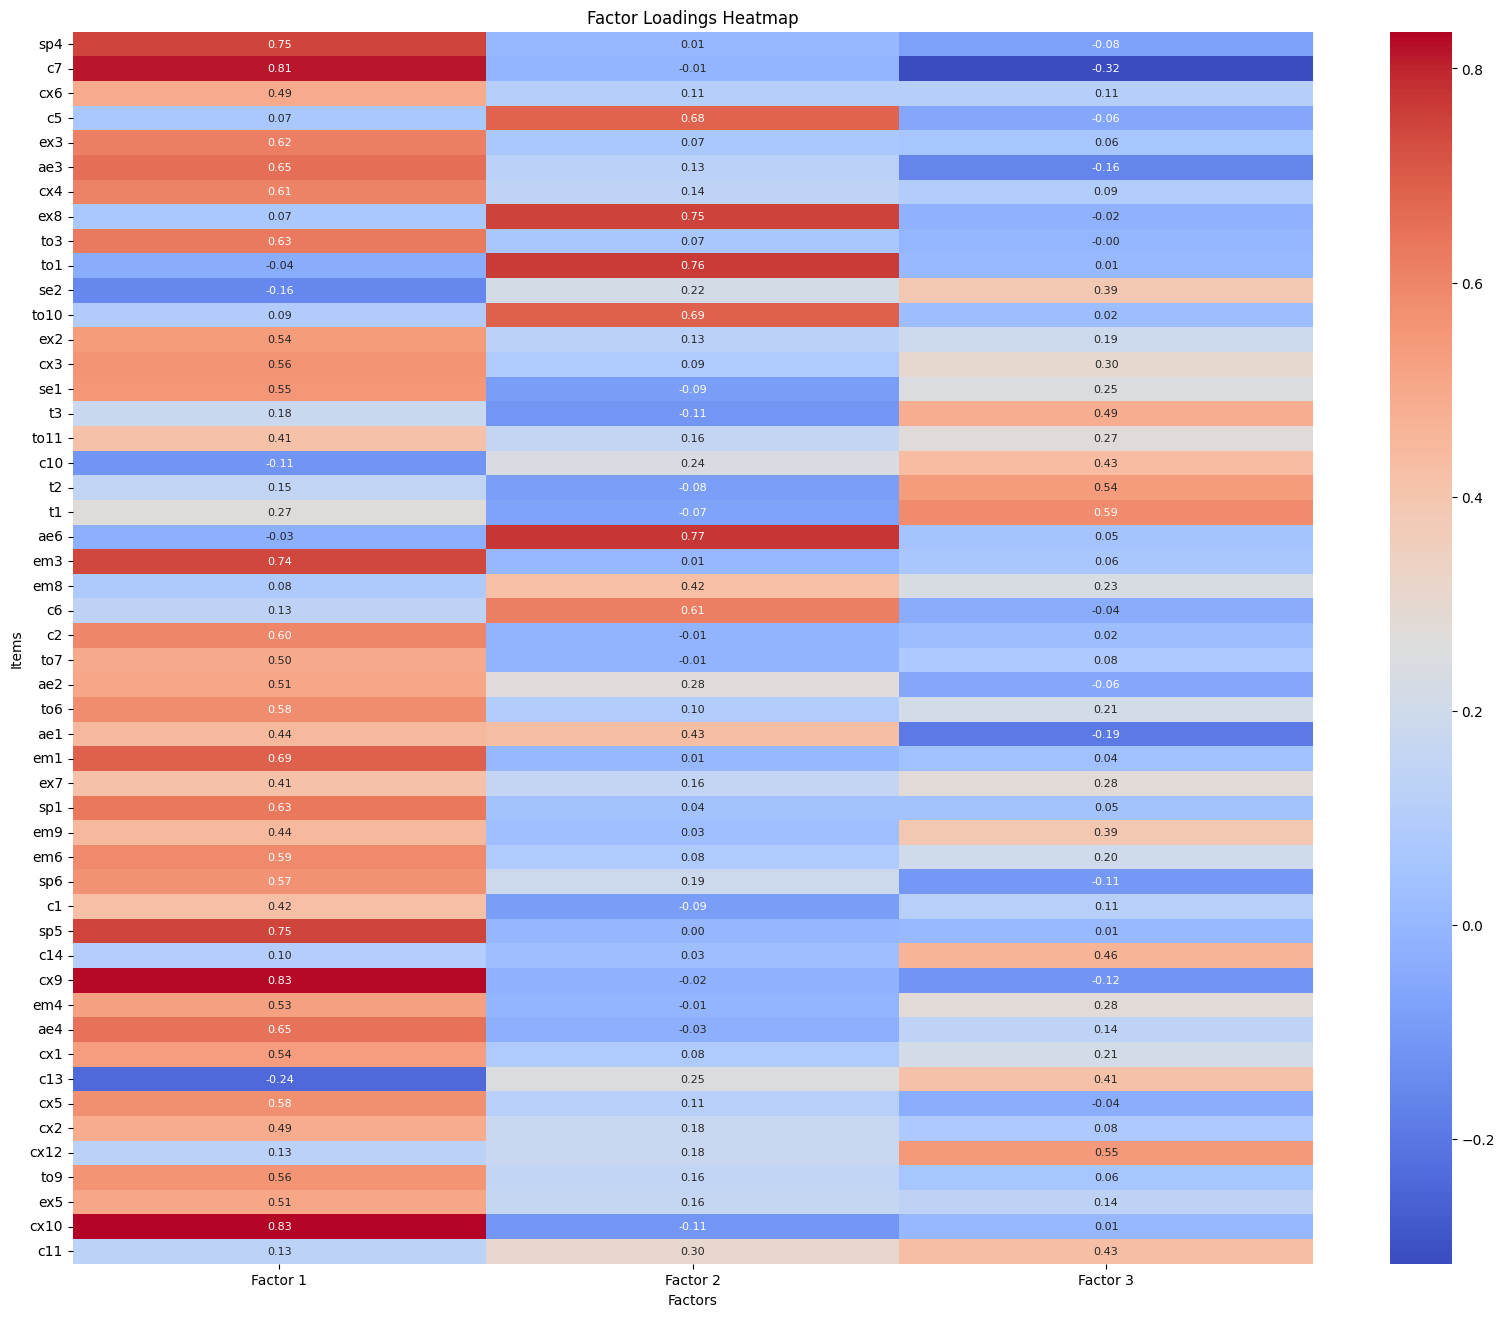

In [25]:
df_3_factor_v2 = df_efa.drop(columns=efa_3_low_loadings_v1)
efa_3_factor_v2 = modeler.efa(df=df_3_factor_v2, n_factors=3)

efa_3_low_loadings_v2 = modeler.get_items_with_low_loadings(
    efa_3_factor_v2.loadings_, df_3_factor_v2.columns, threshold=0.4
)
print("Items with low loadings: ")
print(efa_3_low_loadings_v2)

vizer.plot_loadings_heatmap(
    loadings=efa_3_factor_v2.loadings_,
    item_names=df_3_factor_v2.columns,
    factor_names=[f"Factor {i + 1}" for i in range(efa_3_factor_v2.n_factors)],
)

Remove the item with the low loading

Items with low loadings: 
['to11', 'ex7', 'c13']


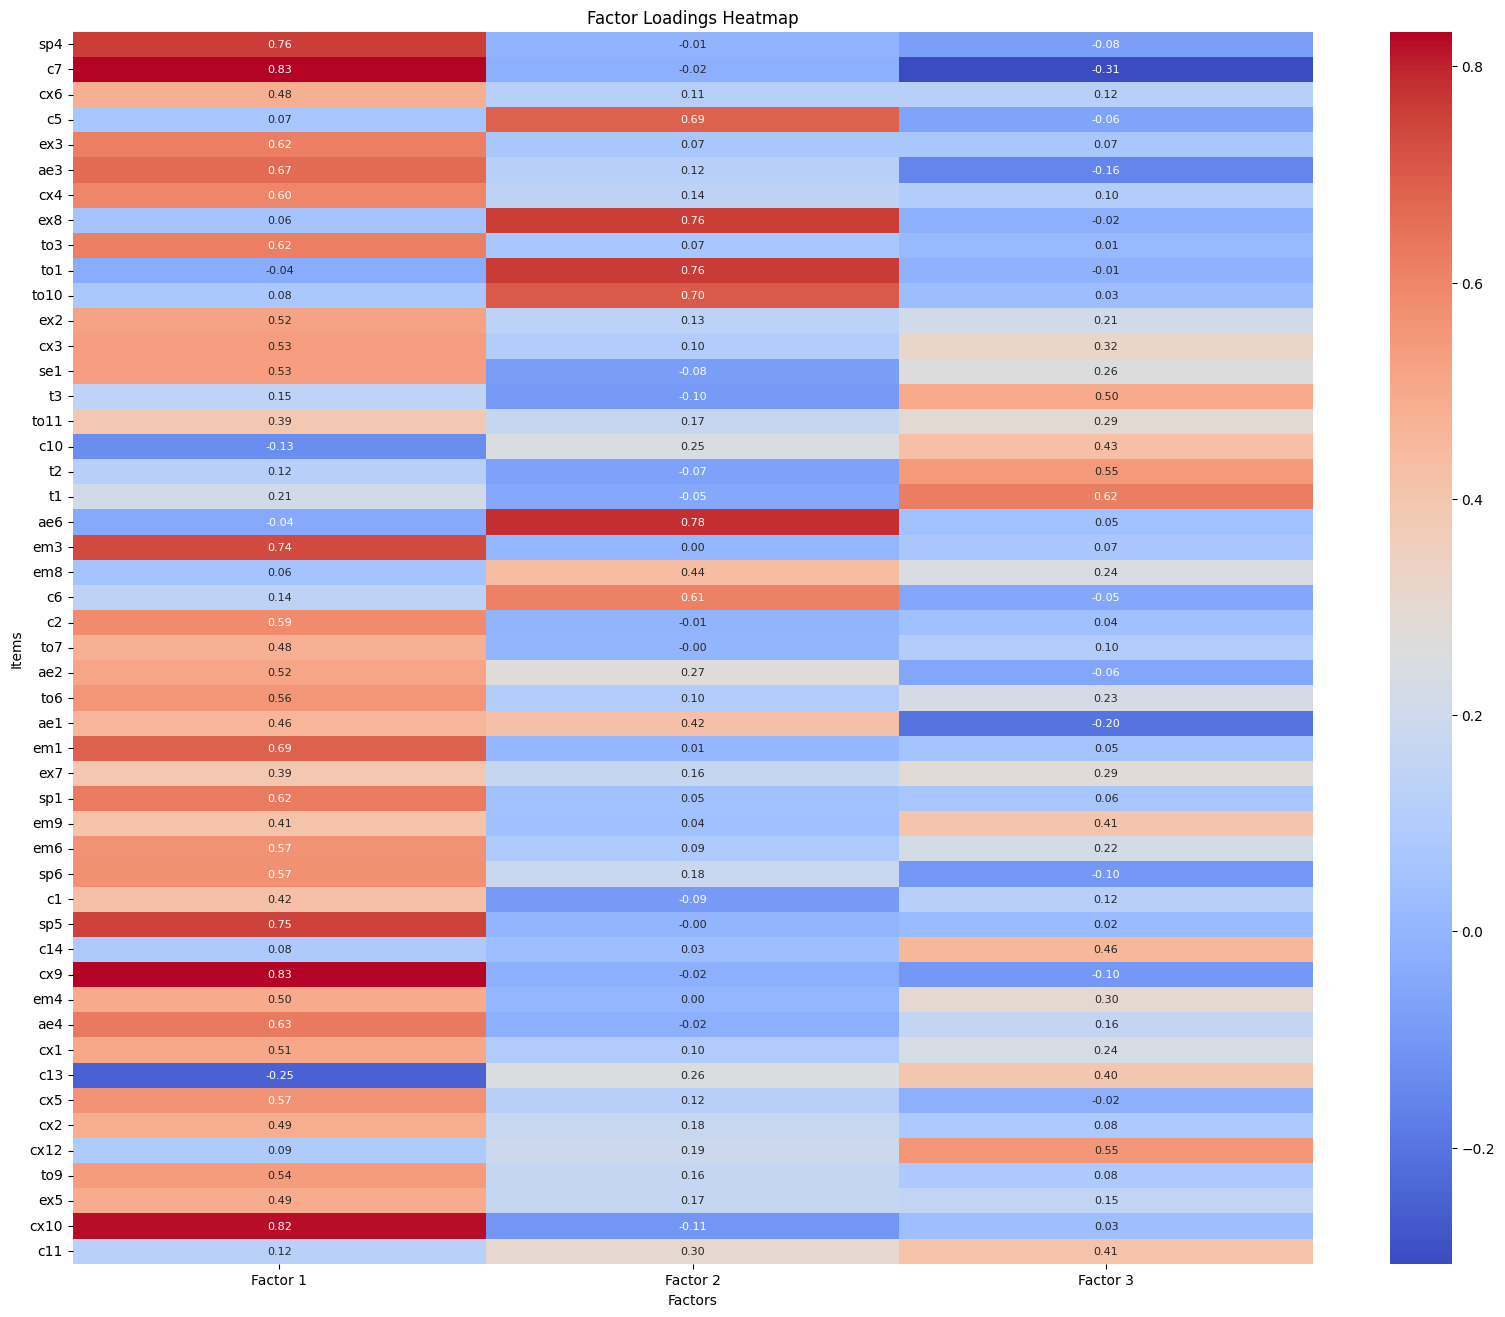

In [26]:
df_3_factor_v3 = df_3_factor_v2.drop(columns=efa_3_low_loadings_v2)
efa_3_factor_v3 = modeler.efa(df=df_3_factor_v3, n_factors=3)

efa_3_low_loadings_v3 = modeler.get_items_with_low_loadings(
    efa_3_factor_v3.loadings_, df_3_factor_v3.columns, threshold=0.4
)
print("Items with low loadings: ")
print(efa_3_low_loadings_v3)

vizer.plot_loadings_heatmap(
    loadings=efa_3_factor_v3.loadings_,
    item_names=df_3_factor_v3.columns,
    factor_names=[f"Factor {i + 1}" for i in range(efa_3_factor_v3.n_factors)],
)

Another round

Items with low loadings: 
[]


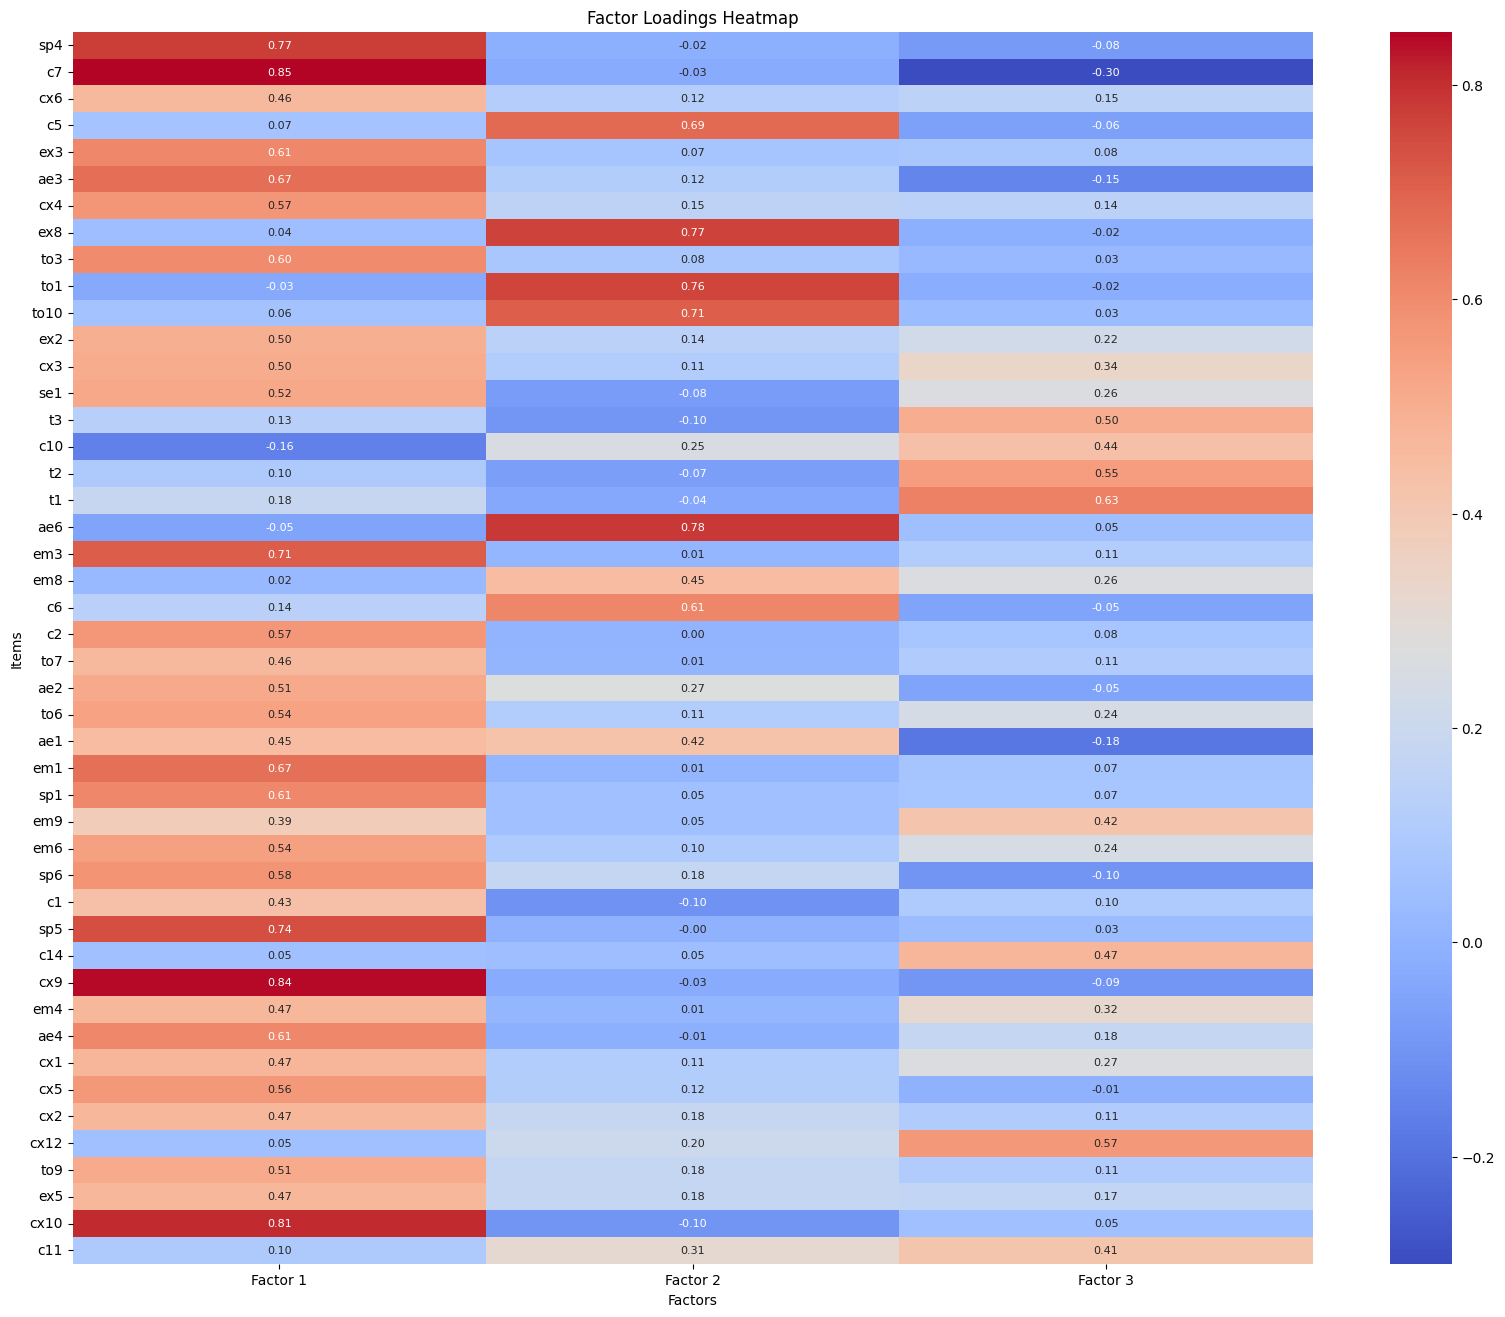

In [27]:
df_3_factor_v4 = df_3_factor_v3.drop(columns=efa_3_low_loadings_v3)
efa_3_factor_v4 = modeler.efa(df=df_3_factor_v4, n_factors=3)

efa_3_low_loadings_v4 = modeler.get_items_with_low_loadings(
    efa_3_factor_v4.loadings_, df_3_factor_v4.columns, threshold=0.4
)
print("Items with low loadings: ")
print(efa_3_low_loadings_v4)

vizer.plot_loadings_heatmap(
    loadings=efa_3_factor_v4.loadings_,
    item_names=df_3_factor_v4.columns,
    factor_names=[f"Factor {i + 1}" for i in range(efa_3_factor_v4.n_factors)],
)

We have some that are close to the threshold of being dropped (like c11), but we can decide based on looking at those if we would want to remove. We can do the same with the 4 and 5 factor solutions. Look at the items on each factor and a correlation matrix of the remaining items to help. 

In [28]:
df_strongest_loadings = modeler.strongest_loadings(
    efa_3_factor_v4.loadings_, df_3_factor_v4.columns
)

# add in the question text
df_question_txt = pd.read_excel(data_loc / "ets_question_text_map.xlsx")
df_strongest_loadings = pd.merge(
    df_strongest_loadings, df_question_txt, on="item", how="left"
)
df_strongest_loadings

,item,strongest_factor,loading,item_text
0,c7,1,0.84965,My life has purpose and meaning to me.
1,cx9,1,0.84117,I feel a sense of belonging.
2,cx10,1,0.80527,I feel fully aligned with life.
3,sp4,1,0.77420,I feel a profound sense of belonging.
4,sp5,1,0.74360,I feel a profound sense of joy.
5,em3,1,0.71429,I experience a sense of aliveness.
6,ae3,1,0.67031,I have the feeling of being cared for.
7,em1,1,0.66978,I experience a calm feeling in my heart.
8,ae4,1,0.61083,I feel empowered.
9,sp1,1,0.60961,I have a sense of trust in life.


Lots of items on factor 1. We could likely make some good arguments for removing some of those if needed. 
Correlation matrix: 

In [29]:
vizer.corr_matrix(df=df_3_factor_v4, cols=df_3_factor_v4.columns)

,sp4,c7,cx6,c5,ex3,ae3,cx4,ex8,to3,to1,to10,ex2,cx3,se1,t3,c10,t2,t1,ae6,em3,em8,c6,c2,to7,ae2,to6,ae1,em1,sp1,em9,em6,sp6,c1,sp5,c14,cx9,em4,ae4,cx1,cx5,cx2,cx12,to9,ex5,cx10,c11
sp4,1.000000,0.593289,0.432747,0.369618,0.542584,0.553496,0.506609,0.346378,0.487238,0.347291,0.364956,0.434138,0.507752,0.439298,0.246494,0.123451,0.216303,0.240321,0.306224,0.532984,0.259110,0.356736,0.417736,0.335550,0.491092,0.464571,0.520389,0.461387,0.493971,0.426694,0.516996,0.514194,0.303908,0.519880,0.163429,0.611291,0.399357,0.458799,0.434766,0.472539,0.416568,0.283784,0.394279,0.477821,0.519234,0.353649
c7,0.593289,1.000000,0.444121,0.397889,0.546310,0.531735,0.485871,0.334366,0.414128,0.282027,0.323926,0.408417,0.413527,0.338300,0.060404,0.024232,0.076209,0.170476,0.308954,0.534247,0.215111,0.342128,0.431366,0.315478,0.490325,0.417610,0.490796,0.451231,0.426791,0.305422,0.375404,0.490076,0.225740,0.505836,0.051910,0.613566,0.378523,0.397882,0.384509,0.430019,0.427033,0.157949,0.411832,0.432784,0.503251,0.239704
cx6,0.432747,0.444121,1.000000,0.373352,0.511406,0.455588,0.517873,0.306949,0.373720,0.327509,0.358493,0.409703,0.502686,0.345405,0.244523,0.169648,0.216777,0.307087,0.369229,0.512071,0.326558,0.282424,0.360393,0.235927,0.363584,0.454459,0.407489,0.416083,0.375853,0.324493,0.478222,0.417274,0.220414,0.412754,0.262425,0.416293,0.408885,0.386935,0.476538,0.382806,0.465479,0.424004,0.426390,0.382713,0.427465,0.333515
c5,0.369618,0.397889,0.373352,1.000000,0.437509,0.407954,0.377898,0.576248,0.358948,0.485390,0.561123,0.378394,0.360624,0.221519,0.034713,0.117644,0.128593,0.197512,0.556971,0.336158,0.412426,0.502562,0.281432,0.289445,0.415975,0.419196,0.469352,0.284864,0.358583,0.337860,0.326292,0.329441,0.128646,0.335607,0.106566,0.337444,0.279563,0.282048,0.357702,0.319226,0.290882,0.198568,0.387149,0.378776,0.305463,0.349502
ex3,0.542584,0.546310,0.511406,0.437509,1.000000,0.564404,0.615844,0.356407,0.351757,0.327962,0.333105,0.431666,0.523419,0.387524,0.274932,0.174292,0.250458,0.328348,0.375727,0.519286,0.285969,0.373023,0.382054,0.285451,0.449164,0.539514,0.440181,0.486868,0.439893,0.435480,0.461332,0.454183,0.224657,0.510421,0.205974,0.515078,0.397932,0.477949,0.470218,0.356355,0.552403,0.406795,0.426878,0.405159,0.516472,0.406892
ae3,0.553496,0.531735,0.455588,0.407954,0.564404,1.000000,0.532146,0.408846,0.382858,0.350866,0.365749,0.399074,0.434996,0.335724,0.198217,0.141741,0.153591,0.203022,0.383791,0.494503,0.275294,0.364756,0.375203,0.303086,0.443642,0.483694,0.495588,0.472721,0.444446,0.371040,0.472995,0.591348,0.309083,0.485377,0.110352,0.550776,0.315133,0.404308,0.415737,0.460959,0.433630,0.239001,0.428923,0.397563,0.479462,0.272267
cx4,0.506609,0.485871,0.517873,0.377898,0.615844,0.532146,1.000000,0.417438,0.423366,0.388365,0.410491,0.512811,0.575288,0.388171,0.244362,0.248907,0.260069,0.391060,0.412639,0.574819,0.400795,0.404291,0.445924,0.250208,0.499911,0.558966,0.565079,0.538647,0.436649,0.432801,0.539456,0.523696,0.228722,0.576713,0.287972,0.530143,0.451817,0.473147,0.541824,0.467757,0.532964,0.437750,0.537249,0.500381,0.567714,0.444650
ex8,0.346378,0.334366,0.306949,0.576248,0.356407,0.408846,0.417438,1.000000,0.370608,0.596968,0.652908,0.441013,0.456940,0.291102,0.113011,0.164910,0.122101,0.222868,0.594368,0.391061,0.388594,0.545752,0.297566,0.293153,0.447348,0.408785,0.537419,0.366984,0.386296,0.320174,0.426034,0.436208,0.196352,0.428245,0.165323,0.409509,0.324653,0.400548,0.382217,0.376677,0.387740,0.274779,0.453123,0.429848,0.372072,0.376370
to3,0.487238,0.414128,0.373720,0.358948,0.351757,0.382858,0.423366,0.370608,1.000000,0.325611,0.387032,0.527622,0.463238,0.341165,0.193151,0.094154,0.116411,0.266969,0.329767,0.523648,0.298824,0.384377,0.433589,0.499048,0.457627,0.500131,0.476884,0.490899,0.533885,0.451597,0.510234,0.393417,0.236665,0.505738,0.188403,0.493252,0.418214,0.493382,0.423465,0.448309,0.403251,0.296757,0.555163,0.465121,0.493207,0.318845
to1,0.347291,0.282027,0.327509,0.485390,0.327962,0.350866,0.

With our scale, none of the inter-item correlations are high, so using this as a reason to drop items is a bit hard. 

# Summary
I re-ran each actor solution, starting with the full set of items and then narrowing them down until they all had a loading of at least 0.4 on at least one factor. When we met last week, I transitioned to the 4 factor solution before fully removing all low loading items. The 5 factor solution now looks better. The 4 factor solution has also changed some, since we started it with the full item set, rather than the partially filtered one from first looking at 5 factors. I can show you how to view a before and after if needed. 

I think we will likely want to go with the 5 factor solution, and maybe reduce items a bit more. If we do, we'll just want to re-run the EFA and make sure items don't switch to different factors. 